## Code actionnable / extraction d'invariant

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

en entrée : x

le code latent est separé en 2 flux : 
- un flux qui code la position/action avec une distribution gaussienne 2D
- un flux qui code pour le label avec une distribution multinomiale 

en sortie : x

passage par un codage one-hot et un tirage multinomial (!!)

le flux multinomial est appris par PG (r = 1 si le label produit est correct, -1 sinon). Reglage fin de  KLZ_FLAG (entre 0.1 et 0.3) pour eviter le collapse du code multinomial (uniforme ou au contraire fogé sur une reponse unique)

le tirage multinomial definit un code unique 2 x 32 sur lequel est appliqué la transformation spatiale (u)

la translation est appliquee uniformement à toutes les caracteristiques

le loss est constitué de quatre termes : BCE_loss, PG_loss, KL et KL_z

convergence assez difficile pour PG (independamment de la reconstruction)






In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_full import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'size': 64, 'mean': 0.0, 'batch_size': 50, 'dimension': 25, 'epochs': 10, 'lr': 0.001, 'verbose': 1, 'momentum': 0.48, 'valid_size': 0.2, 'test_batch_size': 1, 'log_interval': 10, 'no_cuda': True, 'seed': 42, 'std': 1.0, 'num_processes': 1}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [5]:
path = '2018-07-26_actionnable_code_VAE_full_BIAS.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_full_BIAS.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_full_BIAS.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_full import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7f528071ed68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5221d03080>)

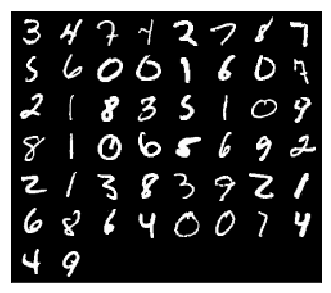

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x_z): Linear(in_features=256, out_features=32, bias=False)
  (fc_latent_label): Linear(in_features=32, out_features=10, bias=False)
  (fc_z_d1): Linear(in_features=10, out_features=32, bias=False)
  (fc_z_d2): Linear(in_features=10, out_features=32, bias=False)
  (fc_x_u): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=2, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=False)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [17]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0.00%)]	BCELoss: 202.81	PG_loss: -1.57	KL: 7.53	KL_z: 0.25
1.0


/home/dauce/Recherche/stages/Malek Bouguerra 2018/Active-Vision-Probabilistic-Model/Where_act_code_VAE_full.py:168: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  z_hat = torch.multinomial(F.softmax(z_logit), 1)
/home/dauce/Recherche/stages/Malek Bouguerra 2018/Active-Vision-Probabilistic-Model/Where_act_code_VAE_full.py:365: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  p = F.softmax(z_logit_output)


128.36470691859722
Accuracy :  0.16
0
0
	Train Epoch: 1 [500/60000 (0.83%)]	BCELoss: 210.65	PG_loss: -1.68	KL: 7.34	KL_z: 0.29
-1.0
144.47451097052544
Accuracy :  0.16
0
6
	Train Epoch: 1 [1000/60000 (1.67%)]	BCELoss: 208.25	PG_loss: -1.35	KL: 7.19	KL_z: 0.27
-1.0
155.02745187701657
Accuracy :  0.22
3
9
	Train Epoch: 1 [1500/60000 (2.50%)]	BCELoss: 206.35	PG_loss: -1.52	KL: 7.27	KL_z: 0.33
-1.0
68.33333432581276
Accuracy :  0.22
8
4
	Train Epoch: 1 [2000/60000 (3.33%)]	BCELoss: 209.67	PG_loss: -1.63	KL: 7.23	KL_z: 0.22
-1.0
177.7058833092451
Accuracy :  0.18
7
0
	Train Epoch: 1 [2500/60000 (4.17%)]	BCELoss: 214.27	PG_loss: -1.67	KL: 7.29	KL_z: 0.21
-1.0
95.87451055645943
Accuracy :  0.1
5
9
	Train Epoch: 1 [3000/60000 (5.00%)]	BCELoss: 217.06	PG_loss: -1.83	KL: 7.57	KL_z: 0.28
-1.0
128.84706002753228
Accuracy :  0.14
0
8
	Train Epoch: 1 [3500/60000 (5.83%)]	BCELoss: 207.79	PG_loss: -1.59	KL: 7.02	KL_z: 0.25
-1.0
99.32549116294831
Accuracy :  0.14
5
6
	Train Epoch: 1 [4000/60000 (6.67%)

	Train Epoch: 1 [31500/60000 (52.50%)]	BCELoss: 199.52	PG_loss: -1.55	KL: 7.58	KL_z: 0.29
-1.0
114.02745193429291
Accuracy :  0.16
9
8
	Train Epoch: 1 [32000/60000 (53.33%)]	BCELoss: 209.00	PG_loss: -1.38	KL: 7.42	KL_z: 0.29
-1.0
111.31764799263328
Accuracy :  0.2
3
0
	Train Epoch: 1 [32500/60000 (54.17%)]	BCELoss: 202.28	PG_loss: -1.68	KL: 7.45	KL_z: 0.37
-1.0
102.38039317727089
Accuracy :  0.18
9
2
	Train Epoch: 1 [33000/60000 (55.00%)]	BCELoss: 208.17	PG_loss: -1.41	KL: 7.63	KL_z: 0.26
-1.0
102.6352949324064
Accuracy :  0.2
7
8
	Train Epoch: 1 [33500/60000 (55.83%)]	BCELoss: 203.77	PG_loss: -1.54	KL: 7.04	KL_z: 0.36
1.0
150.9921578783542
Accuracy :  0.18
3
3
	Train Epoch: 1 [34000/60000 (56.67%)]	BCELoss: 209.48	PG_loss: -1.48	KL: 7.45	KL_z: 0.34
-1.0
60.090196980163455
Accuracy :  0.2
0
4
	Train Epoch: 1 [34500/60000 (57.50%)]	BCELoss: 192.76	PG_loss: -1.73	KL: 7.26	KL_z: 0.24
-1.0
159.76862858142704
Accuracy :  0.14
3
6
	Train Epoch: 1 [35000/60000 (58.33%)]	BCELoss: 210.04	PG_los

	Train Epoch: 2 [2500/60000 (4.17%)]	BCELoss: 200.48	PG_loss: -1.14	KL: 7.37	KL_z: 0.34
-1.0
50.898039961233735
Accuracy :  0.28
1
9
	Train Epoch: 2 [3000/60000 (5.00%)]	BCELoss: 202.47	PG_loss: -1.87	KL: 7.18	KL_z: 0.20
-1.0
81.54509856179357
Accuracy :  0.1
3
7
	Train Epoch: 2 [3500/60000 (5.83%)]	BCELoss: 202.61	PG_loss: -1.56	KL: 7.39	KL_z: 0.25
-1.0
82.22745191212744
Accuracy :  0.18
8
7
	Train Epoch: 2 [4000/60000 (6.67%)]	BCELoss: 205.81	PG_loss: -1.36	KL: 7.37	KL_z: 0.33
1.0
96.79607908427715
Accuracy :  0.22
8
8
	Train Epoch: 2 [4500/60000 (7.50%)]	BCELoss: 207.20	PG_loss: -1.50	KL: 7.51	KL_z: 0.33
-1.0
122.57255012355745
Accuracy :  0.2
3
8
	Train Epoch: 2 [5000/60000 (8.33%)]	BCELoss: 201.98	PG_loss: -1.60	KL: 7.72	KL_z: 0.33
-1.0
134.4941188050434
Accuracy :  0.18
0
8
	Train Epoch: 2 [5500/60000 (9.17%)]	BCELoss: 202.85	PG_loss: -1.79	KL: 7.49	KL_z: 0.36
-1.0
118.46666770987213
Accuracy :  0.12
7
5
	Train Epoch: 2 [6000/60000 (10.00%)]	BCELoss: 199.62	PG_loss: -1.42	KL: 7.5

	Train Epoch: 2 [33500/60000 (55.83%)]	BCELoss: 212.98	PG_loss: -1.73	KL: 7.69	KL_z: 0.25
-1.0
70.56470681447536
Accuracy :  0.14
9
3
	Train Epoch: 2 [34000/60000 (56.67%)]	BCELoss: 201.22	PG_loss: -2.03	KL: 7.32	KL_z: 0.25
-1.0
49.843138087075204
Accuracy :  0.08
9
5
	Train Epoch: 2 [34500/60000 (57.50%)]	BCELoss: 213.71	PG_loss: -1.89	KL: 7.31	KL_z: 0.19
-1.0
87.88627528399229
Accuracy :  0.1
9
4
	Train Epoch: 2 [35000/60000 (58.33%)]	BCELoss: 212.22	PG_loss: -1.86	KL: 7.71	KL_z: 0.25
-1.0
167.47843255475163
Accuracy :  0.12
6
8
	Train Epoch: 2 [35500/60000 (59.17%)]	BCELoss: 198.44	PG_loss: -1.53	KL: 7.58	KL_z: 0.36
-1.0
135.40000087209046
Accuracy :  0.16
3
4
	Train Epoch: 2 [36000/60000 (60.00%)]	BCELoss: 219.75	PG_loss: -1.69	KL: 7.94	KL_z: 0.21
-1.0
135.09019714873284
Accuracy :  0.12
5
0
	Train Epoch: 2 [36500/60000 (60.83%)]	BCELoss: 219.09	PG_loss: -1.68	KL: 8.23	KL_z: 0.26
1.0
96.18823618162423
Accuracy :  0.16
2
2
	Train Epoch: 2 [37000/60000 (61.67%)]	BCELoss: 204.11	PG_lo

	Train Epoch: 3 [4500/60000 (7.50%)]	BCELoss: 216.11	PG_loss: -1.64	KL: 7.69	KL_z: 0.23
-1.0
122.27843227982521
Accuracy :  0.16
8
2
	Train Epoch: 3 [5000/60000 (8.33%)]	BCELoss: 194.58	PG_loss: -1.77	KL: 6.96	KL_z: 0.38
1.0
62.058824164792895
Accuracy :  0.08
7
7
	Train Epoch: 3 [5500/60000 (9.17%)]	BCELoss: 201.38	PG_loss: -1.25	KL: 7.04	KL_z: 0.46
-1.0
83.62745180912316
Accuracy :  0.28
2
3
	Train Epoch: 3 [6000/60000 (10.00%)]	BCELoss: 202.47	PG_loss: -1.76	KL: 7.00	KL_z: 0.26
-1.0
127.03921676147729
Accuracy :  0.12
9
5
	Train Epoch: 3 [6500/60000 (10.83%)]	BCELoss: 190.98	PG_loss: -1.56	KL: 7.17	KL_z: 0.31
-1.0
92.26274582138285
Accuracy :  0.2
0
2
	Train Epoch: 3 [7000/60000 (11.67%)]	BCELoss: 209.01	PG_loss: -1.33	KL: 7.34	KL_z: 0.22
-1.0
127.3137263758108
Accuracy :  0.2
5
9
	Train Epoch: 3 [7500/60000 (12.50%)]	BCELoss: 202.24	PG_loss: -1.44	KL: 7.57	KL_z: 0.27
-1.0
114.09019692614675
Accuracy :  0.22
2
7
	Train Epoch: 3 [8000/60000 (13.33%)]	BCELoss: 227.53	PG_loss: -1.54	KL

	Train Epoch: 3 [35500/60000 (59.17%)]	BCELoss: 209.42	PG_loss: -1.28	KL: 7.25	KL_z: 0.26
-1.0
59.027451710775495
Accuracy :  0.24
4
5
	Train Epoch: 3 [36000/60000 (60.00%)]	BCELoss: 213.55	PG_loss: -1.55	KL: 7.96	KL_z: 0.22
-1.0
70.61176536139101
Accuracy :  0.18
4
1
	Train Epoch: 3 [36500/60000 (60.83%)]	BCELoss: 207.21	PG_loss: -1.69	KL: 7.24	KL_z: 0.29
1.0
118.17647162871435
Accuracy :  0.16
4
4
	Train Epoch: 3 [37000/60000 (61.67%)]	BCELoss: 199.57	PG_loss: -1.80	KL: 7.06	KL_z: 0.23
-1.0
85.85490269213915
Accuracy :  0.1
5
7
	Train Epoch: 3 [37500/60000 (62.50%)]	BCELoss: 201.27	PG_loss: -1.81	KL: 7.31	KL_z: 0.27
1.0
34.309804388321936
Accuracy :  0.1
1
1
	Train Epoch: 3 [38000/60000 (63.33%)]	BCELoss: 189.48	PG_loss: -1.20	KL: 7.10	KL_z: 0.40
-1.0
107.29804029501975
Accuracy :  0.28
4
9
	Train Epoch: 3 [38500/60000 (64.17%)]	BCELoss: 200.61	PG_loss: -1.41	KL: 7.37	KL_z: 0.40
-1.0
109.15294233895838
Accuracy :  0.22
4
2
	Train Epoch: 3 [39000/60000 (65.00%)]	BCELoss: 202.76	PG_los

	Train Epoch: 4 [6500/60000 (10.83%)]	BCELoss: 208.68	PG_loss: -1.99	KL: 7.35	KL_z: 0.21
-1.0
122.63921658229083
Accuracy :  0.08
4
6
	Train Epoch: 4 [7000/60000 (11.67%)]	BCELoss: 197.48	PG_loss: -1.44	KL: 7.78	KL_z: 0.29
-1.0
115.31372637394816
Accuracy :  0.18
9
4
	Train Epoch: 4 [7500/60000 (12.50%)]	BCELoss: 197.31	PG_loss: -1.45	KL: 7.66	KL_z: 0.44
-1.0
88.65490282699466
Accuracy :  0.22
6
9
	Train Epoch: 4 [8000/60000 (13.33%)]	BCELoss: 203.47	PG_loss: -1.83	KL: 8.12	KL_z: 0.28
-1.0
101.71372629422694
Accuracy :  0.1
3
9
	Train Epoch: 4 [8500/60000 (14.17%)]	BCELoss: 192.25	PG_loss: -1.71	KL: 10.31	KL_z: 0.44
1.0
47.152941710315645
Accuracy :  0.16
1
1
	Train Epoch: 4 [9000/60000 (15.00%)]	BCELoss: 221.93	PG_loss: -1.64	KL: 8.00	KL_z: 0.26
-1.0
71.8941182186827
Accuracy :  0.14
1
4
	Train Epoch: 4 [9500/60000 (15.83%)]	BCELoss: 210.45	PG_loss: -1.70	KL: 7.77	KL_z: 0.28
-1.0
134.74509937409312
Accuracy :  0.16
3
5
	Train Epoch: 4 [10000/60000 (16.67%)]	BCELoss: 222.71	PG_loss: -1

	Train Epoch: 4 [37500/60000 (62.50%)]	BCELoss: 204.38	PG_loss: -1.80	KL: 7.69	KL_z: 0.22
-1.0
148.55686360318214
Accuracy :  0.14
5
8
	Train Epoch: 4 [38000/60000 (63.33%)]	BCELoss: 208.51	PG_loss: -1.43	KL: 7.37	KL_z: 0.22
-1.0
91.74117746856064
Accuracy :  0.2
8
5
	Train Epoch: 4 [38500/60000 (64.17%)]	BCELoss: 215.55	PG_loss: -1.51	KL: 7.72	KL_z: 0.28
-1.0
136.89019720628858
Accuracy :  0.2
9
2
	Train Epoch: 4 [39000/60000 (65.00%)]	BCELoss: 197.26	PG_loss: -1.50	KL: 7.33	KL_z: 0.22
1.0
47.87843189574778
Accuracy :  0.22
1
1
	Train Epoch: 4 [39500/60000 (65.83%)]	BCELoss: 202.18	PG_loss: -1.65	KL: 7.59	KL_z: 0.24
1.0
93.41568712703884
Accuracy :  0.18
7
7
	Train Epoch: 4 [40000/60000 (66.67%)]	BCELoss: 200.48	PG_loss: -1.50	KL: 7.96	KL_z: 0.43
-1.0
158.19215824827552
Accuracy :  0.2
5
3
	Train Epoch: 4 [40500/60000 (67.50%)]	BCELoss: 210.24	PG_loss: -1.33	KL: 7.81	KL_z: 0.23
-1.0
132.38431462924927
Accuracy :  0.24
0
3
	Train Epoch: 4 [41000/60000 (68.33%)]	BCELoss: 211.77	PG_loss:

	Train Epoch: 5 [8500/60000 (14.17%)]	BCELoss: 199.13	PG_loss: -1.59	KL: 7.25	KL_z: 0.44
-1.0
131.25098144076765
Accuracy :  0.2
2
0
	Train Epoch: 5 [9000/60000 (15.00%)]	BCELoss: 201.06	PG_loss: -1.72	KL: 7.35	KL_z: 0.34
1.0
62.400000577792525
Accuracy :  0.14
1
1
	Train Epoch: 5 [9500/60000 (15.83%)]	BCELoss: 193.90	PG_loss: -1.62	KL: 7.14	KL_z: 0.30
-1.0
104.64313816279173
Accuracy :  0.12
9
4
	Train Epoch: 5 [10000/60000 (16.67%)]	BCELoss: 209.80	PG_loss: -1.76	KL: 8.09	KL_z: 0.34
-1.0
85.1137266792357
Accuracy :  0.14
3
8
	Train Epoch: 5 [10500/60000 (17.50%)]	BCELoss: 199.07	PG_loss: -1.91	KL: 7.22	KL_z: 0.31
1.0
46.98823558539152
Accuracy :  0.12
1
1
	Train Epoch: 5 [11000/60000 (18.33%)]	BCELoss: 207.25	PG_loss: -1.14	KL: 7.45	KL_z: 0.25
-1.0
78.59215759998187
Accuracy :  0.26
0
9
	Train Epoch: 5 [11500/60000 (19.17%)]	BCELoss: 220.48	PG_loss: -1.72	KL: 7.31	KL_z: 0.18
-1.0
124.18823638930917
Accuracy :  0.1
8
0
	Train Epoch: 5 [12000/60000 (20.00%)]	BCELoss: 209.36	PG_loss: -1

	Train Epoch: 5 [39500/60000 (65.83%)]	BCELoss: 215.87	PG_loss: -1.10	KL: 7.59	KL_z: 0.32
-1.0
116.72156975790858
Accuracy :  0.24
4
0
	Train Epoch: 5 [40000/60000 (66.67%)]	BCELoss: 207.49	PG_loss: -1.84	KL: 7.46	KL_z: 0.25
1.0
98.94902047654614
Accuracy :  0.08
6
6
	Train Epoch: 5 [40500/60000 (67.50%)]	BCELoss: 207.24	PG_loss: -1.92	KL: 7.38	KL_z: 0.28
-1.0
99.99215774610639
Accuracy :  0.1
2
6
	Train Epoch: 5 [41000/60000 (68.33%)]	BCELoss: 195.81	PG_loss: -1.64	KL: 7.34	KL_z: 0.43
1.0
133.94902060180902
Accuracy :  0.2
3
3
	Train Epoch: 5 [41500/60000 (69.17%)]	BCELoss: 203.50	PG_loss: -1.89	KL: 7.24	KL_z: 0.27
-1.0
86.48235347494483
Accuracy :  0.1
6
1
	Train Epoch: 5 [42000/60000 (70.00%)]	BCELoss: 207.14	PG_loss: -1.88	KL: 7.10	KL_z: 0.24
-1.0
121.572549845092
Accuracy :  0.1
0
8
	Train Epoch: 5 [42500/60000 (70.83%)]	BCELoss: 195.20	PG_loss: -1.15	KL: 7.49	KL_z: 0.36
-1.0
88.01568695995957
Accuracy :  0.28
1
7
	Train Epoch: 5 [43000/60000 (71.67%)]	BCELoss: 205.07	PG_loss: -1.

	Train Epoch: 6 [10500/60000 (17.50%)]	BCELoss: 201.61	PG_loss: -1.35	KL: 7.62	KL_z: 0.47
1.0
37.949020102620125
Accuracy :  0.24
1
1
	Train Epoch: 6 [11000/60000 (18.33%)]	BCELoss: 198.55	PG_loss: -1.41	KL: 7.30	KL_z: 0.48
-1.0
48.31372604612261
Accuracy :  0.24
5
1
	Train Epoch: 6 [11500/60000 (19.17%)]	BCELoss: 202.02	PG_loss: -1.25	KL: 7.33	KL_z: 0.35
-1.0
111.52549120504409
Accuracy :  0.28
1
8
	Train Epoch: 6 [12000/60000 (20.00%)]	BCELoss: 204.55	PG_loss: -1.65	KL: 7.21	KL_z: 0.36
-1.0
115.20392222888768
Accuracy :  0.18
4
9
	Train Epoch: 6 [12500/60000 (20.83%)]	BCELoss: 210.83	PG_loss: -1.67	KL: 7.74	KL_z: 0.27
-1.0
134.46274617128074
Accuracy :  0.12
0
2
	Train Epoch: 6 [13000/60000 (21.67%)]	BCELoss: 202.76	PG_loss: -1.72	KL: 7.45	KL_z: 0.25
-1.0
91.32941282913089
Accuracy :  0.1
2
5
	Train Epoch: 6 [13500/60000 (22.50%)]	BCELoss: 199.54	PG_loss: -1.27	KL: 7.13	KL_z: 0.38
1.0
87.17254956625402
Accuracy :  0.26
1
1
	Train Epoch: 6 [14000/60000 (23.33%)]	BCELoss: 194.04	PG_los

	Train Epoch: 6 [41500/60000 (69.17%)]	BCELoss: 206.44	PG_loss: -1.43	KL: 7.38	KL_z: 0.40
-1.0
89.61176546476781
Accuracy :  0.24
1
9
	Train Epoch: 6 [42000/60000 (70.00%)]	BCELoss: 205.90	PG_loss: -1.36	KL: 8.40	KL_z: 0.27
-1.0
99.86666772514582
Accuracy :  0.22
5
9
	Train Epoch: 6 [42500/60000 (70.83%)]	BCELoss: 208.51	PG_loss: -1.46	KL: 7.52	KL_z: 0.34
-1.0
59.952941903844476
Accuracy :  0.18
8
5
	Train Epoch: 6 [43000/60000 (71.67%)]	BCELoss: 223.41	PG_loss: -1.53	KL: 7.05	KL_z: 0.21
-1.0
109.01176565233618
Accuracy :  0.2
0
5
	Train Epoch: 6 [43500/60000 (72.50%)]	BCELoss: 205.70	PG_loss: -1.65	KL: 8.25	KL_z: 0.38
-1.0
94.23921640357003
Accuracy :  0.18
3
7
	Train Epoch: 6 [44000/60000 (73.33%)]	BCELoss: 208.43	PG_loss: -1.54	KL: 7.60	KL_z: 0.28
-1.0
152.5254912469536
Accuracy :  0.16
7
8
	Train Epoch: 6 [44500/60000 (74.17%)]	BCELoss: 199.75	PG_loss: -1.68	KL: 7.00	KL_z: 0.24
-1.0
61.917648209724575
Accuracy :  0.16
1
5
	Train Epoch: 6 [45000/60000 (75.00%)]	BCELoss: 203.58	PG_lo

	Train Epoch: 7 [12500/60000 (20.83%)]	BCELoss: 201.25	PG_loss: -1.40	KL: 7.46	KL_z: 0.30
-1.0
54.80000048875809
Accuracy :  0.2
7
1
	Train Epoch: 7 [13000/60000 (21.67%)]	BCELoss: 209.19	PG_loss: -1.68	KL: 7.69	KL_z: 0.33
-1.0
115.0823537632823
Accuracy :  0.14
2
6
	Train Epoch: 7 [13500/60000 (22.50%)]	BCELoss: 205.95	PG_loss: -1.52	KL: 7.55	KL_z: 0.30
1.0
120.80000122915953
Accuracy :  0.2
6
6
	Train Epoch: 7 [14000/60000 (23.33%)]	BCELoss: 193.61	PG_loss: -1.26	KL: 7.31	KL_z: 0.48
-1.0
123.86666750675067
Accuracy :  0.2
4
5
	Train Epoch: 7 [14500/60000 (24.17%)]	BCELoss: 197.14	PG_loss: -1.63	KL: 7.27	KL_z: 0.33
1.0
48.50196119770408
Accuracy :  0.2
1
1
	Train Epoch: 7 [15000/60000 (25.00%)]	BCELoss: 206.35	PG_loss: -1.63	KL: 7.39	KL_z: 0.24
-1.0
101.50588328484446
Accuracy :  0.14
3
2
	Train Epoch: 7 [15500/60000 (25.83%)]	BCELoss: 200.58	PG_loss: -1.45	KL: 7.72	KL_z: 0.31
-1.0
140.72941268514842
Accuracy :  0.22
7
6
	Train Epoch: 7 [16000/60000 (26.67%)]	BCELoss: 208.30	PG_loss: 

	Train Epoch: 7 [43500/60000 (72.50%)]	BCELoss: 194.79	PG_loss: -1.61	KL: 7.21	KL_z: 0.42
-1.0
102.96078545972705
Accuracy :  0.2
2
3
	Train Epoch: 7 [44000/60000 (73.33%)]	BCELoss: 200.02	PG_loss: -1.07	KL: 7.48	KL_z: 0.41
-1.0
73.60000091604888
Accuracy :  0.32
6
3
	Train Epoch: 7 [44500/60000 (74.17%)]	BCELoss: 194.01	PG_loss: -1.15	KL: 7.08	KL_z: 0.30
-1.0
204.2980400417
Accuracy :  0.28
0
7
	Train Epoch: 7 [45000/60000 (75.00%)]	BCELoss: 201.29	PG_loss: -1.53	KL: 7.50	KL_z: 0.34
-1.0
115.23529500467703
Accuracy :  0.22
5
2
	Train Epoch: 7 [45500/60000 (75.83%)]	BCELoss: 194.94	PG_loss: -1.21	KL: 7.20	KL_z: 0.27
-1.0
101.7647068160586
Accuracy :  0.28
8
9
	Train Epoch: 7 [46000/60000 (76.67%)]	BCELoss: 206.74	PG_loss: -1.30	KL: 7.47	KL_z: 0.40
-1.0
69.23529521096498
Accuracy :  0.26
9
7
	Train Epoch: 7 [46500/60000 (77.50%)]	BCELoss: 211.92	PG_loss: -1.89	KL: 7.05	KL_z: 0.38
-1.0
165.61960876360536
Accuracy :  0.12
2
8
	Train Epoch: 7 [47000/60000 (78.33%)]	BCELoss: 193.13	PG_loss:

	Train Epoch: 8 [14500/60000 (24.17%)]	BCELoss: 207.63	PG_loss: -1.34	KL: 7.33	KL_z: 0.33
-1.0
100.14117753505707
Accuracy :  0.22
6
0
	Train Epoch: 8 [15000/60000 (25.00%)]	BCELoss: 204.50	PG_loss: -1.55	KL: 7.25	KL_z: 0.22
1.0
146.17254998441786
Accuracy :  0.2
0
0
	Train Epoch: 8 [15500/60000 (25.83%)]	BCELoss: 194.54	PG_loss: -1.44	KL: 7.19	KL_z: 0.44
-1.0
109.14117741538212
Accuracy :  0.24
5
3
	Train Epoch: 8 [16000/60000 (26.67%)]	BCELoss: 209.32	PG_loss: -1.80	KL: 7.14	KL_z: 0.24
-1.0
166.51372639741749
Accuracy :  0.14
5
6
	Train Epoch: 8 [16500/60000 (27.50%)]	BCELoss: 221.68	PG_loss: -1.40	KL: 7.71	KL_z: 0.25
-1.0
84.72156923916191
Accuracy :  0.18
5
9
	Train Epoch: 8 [17000/60000 (28.33%)]	BCELoss: 205.78	PG_loss: -1.42	KL: 7.31	KL_z: 0.35
-1.0
55.070588920265436
Accuracy :  0.22
1
7
	Train Epoch: 8 [17500/60000 (29.17%)]	BCELoss: 190.91	PG_loss: -1.28	KL: 7.34	KL_z: 0.32
-1.0
90.76470688451082
Accuracy :  0.24
6
4
	Train Epoch: 8 [18000/60000 (30.00%)]	BCELoss: 201.12	PG_l

	Train Epoch: 8 [45500/60000 (75.83%)]	BCELoss: 205.49	PG_loss: -1.33	KL: 7.29	KL_z: 0.26
-1.0
88.00392263801768
Accuracy :  0.22
2
3
	Train Epoch: 8 [46000/60000 (76.67%)]	BCELoss: 214.81	PG_loss: -1.90	KL: 7.53	KL_z: 0.20
-1.0
61.3294125944376
Accuracy :  0.12
9
8
	Train Epoch: 8 [46500/60000 (77.50%)]	BCELoss: 208.81	PG_loss: -1.45	KL: 7.51	KL_z: 0.29
-1.0
113.69804004579782
Accuracy :  0.18
7
6
	Train Epoch: 8 [47000/60000 (78.33%)]	BCELoss: 206.37	PG_loss: -1.39	KL: 7.23	KL_z: 0.34
-1.0
77.92156941723078
Accuracy :  0.18
2
9
	Train Epoch: 8 [47500/60000 (79.17%)]	BCELoss: 205.27	PG_loss: -1.56	KL: 7.30	KL_z: 0.28
-1.0
74.32941241655499
Accuracy :  0.14
1
7
	Train Epoch: 8 [48000/60000 (80.00%)]	BCELoss: 193.98	PG_loss: -1.18	KL: 7.19	KL_z: 0.42
1.0
70.4627457074821
Accuracy :  0.28
7
7
	Train Epoch: 8 [48500/60000 (80.83%)]	BCELoss: 197.74	PG_loss: -1.90	KL: 6.97	KL_z: 0.29
-1.0
108.2156871818006
Accuracy :  0.12
8
3
	Train Epoch: 8 [49000/60000 (81.67%)]	BCELoss: 196.84	PG_loss: 

	Train Epoch: 9 [16500/60000 (27.50%)]	BCELoss: 205.50	PG_loss: -1.57	KL: 7.34	KL_z: 0.22
-1.0
124.11764786113054
Accuracy :  0.18
5
4
	Train Epoch: 9 [17000/60000 (28.33%)]	BCELoss: 216.25	PG_loss: -1.76	KL: 7.15	KL_z: 0.22
-1.0
86.69804029772058
Accuracy :  0.1
4
6
	Train Epoch: 9 [17500/60000 (29.17%)]	BCELoss: 201.65	PG_loss: -1.83	KL: 7.22	KL_z: 0.30
-1.0
125.47451061755419
Accuracy :  0.14
9
4
	Train Epoch: 9 [18000/60000 (30.00%)]	BCELoss: 215.16	PG_loss: -1.10	KL: 7.30	KL_z: 0.28
1.0
78.95686368644238
Accuracy :  0.26
5
5
	Train Epoch: 9 [18500/60000 (30.83%)]	BCELoss: 207.91	PG_loss: -1.58	KL: 7.48	KL_z: 0.19
-1.0
143.19607942551374
Accuracy :  0.14
6
3
	Train Epoch: 9 [19000/60000 (31.67%)]	BCELoss: 208.02	PG_loss: -1.72	KL: 7.37	KL_z: 0.24
-1.0
132.05882458388805
Accuracy :  0.14
9
2
	Train Epoch: 9 [19500/60000 (32.50%)]	BCELoss: 212.26	PG_loss: -1.45	KL: 7.44	KL_z: 0.34
-1.0
146.85490311309695
Accuracy :  0.2
2
0
	Train Epoch: 9 [20000/60000 (33.33%)]	BCELoss: 213.85	PG_lo

	Train Epoch: 9 [47500/60000 (79.17%)]	BCELoss: 208.07	PG_loss: -1.83	KL: 7.99	KL_z: 0.29
-1.0
77.67058895807713
Accuracy :  0.1
7
2
	Train Epoch: 9 [48000/60000 (80.00%)]	BCELoss: 206.31	PG_loss: -1.55	KL: 7.74	KL_z: 0.39
-1.0
69.78039314877242
Accuracy :  0.18
2
8
	Train Epoch: 9 [48500/60000 (80.83%)]	BCELoss: 205.98	PG_loss: -1.63	KL: 7.24	KL_z: 0.27
-1.0
124.88627531006932
Accuracy :  0.16
2
8
	Train Epoch: 9 [49000/60000 (81.67%)]	BCELoss: 190.36	PG_loss: -1.32	KL: 7.12	KL_z: 0.50
-1.0
66.17647144943476
Accuracy :  0.24
1
3
	Train Epoch: 9 [49500/60000 (82.50%)]	BCELoss: 202.28	PG_loss: -1.30	KL: 7.44	KL_z: 0.39
-1.0
139.5529422648251
Accuracy :  0.24
0
6
	Train Epoch: 9 [50000/60000 (83.33%)]	BCELoss: 210.96	PG_loss: -1.47	KL: 8.03	KL_z: 0.44
-1.0
116.04705998301506
Accuracy :  0.22
0
2
	Train Epoch: 9 [50500/60000 (84.17%)]	BCELoss: 202.78	PG_loss: -1.86	KL: 7.21	KL_z: 0.24
-1.0
114.43921661376953
Accuracy :  0.1
7
4
	Train Epoch: 9 [51000/60000 (85.00%)]	BCELoss: 219.83	PG_los

	Train Epoch: 10 [18500/60000 (30.83%)]	BCELoss: 200.66	PG_loss: -1.96	KL: 7.48	KL_z: 0.41
-1.0
93.14902060478926
Accuracy :  0.14
1
6
	Train Epoch: 10 [19000/60000 (31.67%)]	BCELoss: 198.95	PG_loss: -1.54	KL: 7.11	KL_z: 0.34
-1.0
61.93333409400657
Accuracy :  0.18
9
7
	Train Epoch: 10 [19500/60000 (32.50%)]	BCELoss: 208.04	PG_loss: -1.30	KL: 7.28	KL_z: 0.32
-1.0
56.56078498903662
Accuracy :  0.26
0
4
	Train Epoch: 10 [20000/60000 (33.33%)]	BCELoss: 194.18	PG_loss: -1.54	KL: 7.49	KL_z: 0.30
1.0
114.34509909199551
Accuracy :  0.18
3
3
	Train Epoch: 10 [20500/60000 (34.17%)]	BCELoss: 197.17	PG_loss: -1.47	KL: 7.21	KL_z: 0.34
-1.0
117.25882432516664
Accuracy :  0.2
8
4
	Train Epoch: 10 [21000/60000 (35.00%)]	BCELoss: 204.95	PG_loss: -1.65	KL: 7.34	KL_z: 0.27
1.0
58.254902467131615
Accuracy :  0.16
1
1
	Train Epoch: 10 [21500/60000 (35.83%)]	BCELoss: 193.68	PG_loss: -1.49	KL: 7.45	KL_z: 0.43
-1.0
74.35686364769936
Accuracy :  0.24
1
3
	Train Epoch: 10 [22000/60000 (36.67%)]	BCELoss: 191.37

	Train Epoch: 10 [49000/60000 (81.67%)]	BCELoss: 195.73	PG_loss: -1.74	KL: 7.29	KL_z: 0.33
-1.0
80.47058922750875
Accuracy :  0.16
5
9
	Train Epoch: 10 [49500/60000 (82.50%)]	BCELoss: 198.58	PG_loss: -1.67	KL: 7.28	KL_z: 0.23
-1.0
59.13333361595869
Accuracy :  0.16
6
1
	Train Epoch: 10 [50000/60000 (83.33%)]	BCELoss: 217.64	PG_loss: -1.88	KL: 7.36	KL_z: 0.34
-1.0
90.43529513757676
Accuracy :  0.14
9
8
	Train Epoch: 10 [50500/60000 (84.17%)]	BCELoss: 210.33	PG_loss: -1.56	KL: 7.93	KL_z: 0.26
-1.0
72.73725554114208
Accuracy :  0.16
7
4
	Train Epoch: 10 [51000/60000 (85.00%)]	BCELoss: 193.09	PG_loss: -1.50	KL: 7.31	KL_z: 0.48
-1.0
55.13333411887288
Accuracy :  0.26
3
4
	Train Epoch: 10 [51500/60000 (85.83%)]	BCELoss: 212.89	PG_loss: -1.44	KL: 7.39	KL_z: 0.33
-1.0
72.71764780115336
Accuracy :  0.24
2
9
	Train Epoch: 10 [52000/60000 (86.67%)]	BCELoss: 199.58	PG_loss: -1.47	KL: 7.38	KL_z: 0.40
1.0
158.61960896104574
Accuracy :  0.26
0
0
	Train Epoch: 10 [52500/60000 (87.50%)]	BCELoss: 204.06

	Train Epoch: 11 [19500/60000 (32.50%)]	BCELoss: 205.96	PG_loss: -1.38	KL: 7.30	KL_z: 0.28
-1.0
131.42353040585294
Accuracy :  0.22
2
8
	Train Epoch: 11 [20000/60000 (33.33%)]	BCELoss: 209.56	PG_loss: -1.46	KL: 7.42	KL_z: 0.32
-1.0
110.71372660249472
Accuracy :  0.18
0
2
	Train Epoch: 11 [20500/60000 (34.17%)]	BCELoss: 197.55	PG_loss: -1.41	KL: 7.33	KL_z: 0.37
-1.0
98.13333421200514
Accuracy :  0.24
2
3
	Train Epoch: 11 [21000/60000 (35.00%)]	BCELoss: 198.01	PG_loss: -1.41	KL: 7.41	KL_z: 0.33
1.0
93.64705961244181
Accuracy :  0.22
9
9
	Train Epoch: 11 [21500/60000 (35.83%)]	BCELoss: 188.91	PG_loss: -1.46	KL: 7.34	KL_z: 0.44
1.0
96.50980486441404
Accuracy :  0.2
7
7
	Train Epoch: 11 [22000/60000 (36.67%)]	BCELoss: 208.23	PG_loss: -1.66	KL: 7.69	KL_z: 0.27
-1.0
134.01176562160254
Accuracy :  0.14
0
6
	Train Epoch: 11 [22500/60000 (37.50%)]	BCELoss: 208.95	PG_loss: -1.69	KL: 7.44	KL_z: 0.34
-1.0
106.92156952992082
Accuracy :  0.14
8
5
	Train Epoch: 11 [23000/60000 (38.33%)]	BCELoss: 213.6

	Train Epoch: 11 [50000/60000 (83.33%)]	BCELoss: 202.77	PG_loss: -1.60	KL: 7.67	KL_z: 0.38
1.0
126.39607958076522
Accuracy :  0.18
0
0
	Train Epoch: 11 [50500/60000 (84.17%)]	BCELoss: 207.70	PG_loss: -1.62	KL: 8.11	KL_z: 0.20
-1.0
98.51764759421349
Accuracy :  0.14
7
1
	Train Epoch: 11 [51000/60000 (85.00%)]	BCELoss: 212.34	PG_loss: -1.58	KL: 7.34	KL_z: 0.30
1.0
71.78823569789529
Accuracy :  0.18
1
1
	Train Epoch: 11 [51500/60000 (85.83%)]	BCELoss: 199.13	PG_loss: -1.18	KL: 7.13	KL_z: 0.33
1.0
43.49019651254639
Accuracy :  0.3
1
1
	Train Epoch: 11 [52000/60000 (86.67%)]	BCELoss: 210.11	PG_loss: -1.88	KL: 7.80	KL_z: 0.22
-1.0
102.61960880784318
Accuracy :  0.06
7
5
	Train Epoch: 11 [52500/60000 (87.50%)]	BCELoss: 208.33	PG_loss: -1.31	KL: 7.56	KL_z: 0.39
-1.0
82.945099003613
Accuracy :  0.26
1
4
	Train Epoch: 11 [53000/60000 (88.33%)]	BCELoss: 200.75	PG_loss: -1.65	KL: 7.43	KL_z: 0.29
1.0
82.59215789381415
Accuracy :  0.14
2
2
	Train Epoch: 11 [53500/60000 (89.17%)]	BCELoss: 209.21	PG_l

	Train Epoch: 12 [21000/60000 (35.00%)]	BCELoss: 202.16	PG_loss: -1.51	KL: 7.23	KL_z: 0.35
-1.0
93.01960842683911
Accuracy :  0.22
2
7
	Train Epoch: 12 [21500/60000 (35.83%)]	BCELoss: 203.18	PG_loss: -1.65	KL: 7.37	KL_z: 0.31
1.0
48.729412311688066
Accuracy :  0.16
1
1
	Train Epoch: 12 [22000/60000 (36.67%)]	BCELoss: 195.83	PG_loss: -1.55	KL: 7.54	KL_z: 0.35
-1.0
52.670588999055326
Accuracy :  0.22
0
3
	Train Epoch: 12 [22500/60000 (37.50%)]	BCELoss: 196.38	PG_loss: -1.56	KL: 7.46	KL_z: 0.40
1.0
145.04313808120787
Accuracy :  0.22
0
0
	Train Epoch: 12 [23000/60000 (38.33%)]	BCELoss: 212.34	PG_loss: -1.40	KL: 7.29	KL_z: 0.26
-1.0
87.96078536100686
Accuracy :  0.22
4
5
	Train Epoch: 12 [23500/60000 (39.17%)]	BCELoss: 210.49	PG_loss: -1.56	KL: 7.20	KL_z: 0.31
-1.0
125.21960888057947
Accuracy :  0.18
9
3
	Train Epoch: 12 [24000/60000 (40.00%)]	BCELoss: 209.45	PG_loss: -1.69	KL: 7.33	KL_z: 0.22
1.0
72.8431378705427
Accuracy :  0.16
1
1
	Train Epoch: 12 [24500/60000 (40.83%)]	BCELoss: 206.73

	Train Epoch: 12 [51500/60000 (85.83%)]	BCELoss: 196.66	PG_loss: -1.44	KL: 7.37	KL_z: 0.45
-1.0
93.78823619056493
Accuracy :  0.22
5
4
	Train Epoch: 12 [52000/60000 (86.67%)]	BCELoss: 203.40	PG_loss: -1.87	KL: 7.57	KL_z: 0.24
-1.0
103.86274609714746
Accuracy :  0.12
4
9
	Train Epoch: 12 [52500/60000 (87.50%)]	BCELoss: 208.95	PG_loss: -1.34	KL: 7.20	KL_z: 0.28
-1.0
75.40392226167023
Accuracy :  0.26
5
3
	Train Epoch: 12 [53000/60000 (88.33%)]	BCELoss: 214.57	PG_loss: -1.42	KL: 7.43	KL_z: 0.27
1.0
103.50588328391314
Accuracy :  0.22
6
6
	Train Epoch: 12 [53500/60000 (89.17%)]	BCELoss: 215.30	PG_loss: -1.52	KL: 7.31	KL_z: 0.29
1.0
69.99607910774648
Accuracy :  0.16
7
7
	Train Epoch: 12 [54000/60000 (90.00%)]	BCELoss: 204.54	PG_loss: -1.62	KL: 7.25	KL_z: 0.37
-1.0
122.84705984033644
Accuracy :  0.18
9
0
	Train Epoch: 12 [54500/60000 (90.83%)]	BCELoss: 203.68	PG_loss: -1.20	KL: 7.51	KL_z: 0.26
1.0
112.92941259685904
Accuracy :  0.26
7
7
	Train Epoch: 12 [55000/60000 (91.67%)]	BCELoss: 207.7

	Train Epoch: 13 [22000/60000 (36.67%)]	BCELoss: 204.85	PG_loss: -1.37	KL: 7.11	KL_z: 0.29
-1.0
95.86666752863675
Accuracy :  0.2
3
7
	Train Epoch: 13 [22500/60000 (37.50%)]	BCELoss: 200.78	PG_loss: -1.00	KL: 7.78	KL_z: 0.33
1.0
134.91372652724385
Accuracy :  0.32
9
9
	Train Epoch: 13 [23000/60000 (38.33%)]	BCELoss: 199.94	PG_loss: -1.67	KL: 7.93	KL_z: 0.42
-1.0
64.84313792362809
Accuracy :  0.18
6
9
	Train Epoch: 13 [23500/60000 (39.17%)]	BCELoss: 206.67	PG_loss: -1.96	KL: 7.45	KL_z: 0.21
-1.0
74.749020263087
Accuracy :  0.1
7
6
	Train Epoch: 13 [24000/60000 (40.00%)]	BCELoss: 205.97	PG_loss: -1.79	KL: 7.47	KL_z: 0.26
-1.0
97.79607920628041
Accuracy :  0.14
8
6
	Train Epoch: 13 [24500/60000 (40.83%)]	BCELoss: 199.03	PG_loss: -1.28	KL: 7.73	KL_z: 0.30
1.0
68.1686280053109
Accuracy :  0.28
1
1
	Train Epoch: 13 [25000/60000 (41.67%)]	BCELoss: 198.21	PG_loss: -1.24	KL: 7.38	KL_z: 0.52
-1.0
142.29019715776667
Accuracy :  0.24
3
2
	Train Epoch: 13 [25500/60000 (42.50%)]	BCELoss: 194.87	PG_l

	Train Epoch: 13 [52500/60000 (87.50%)]	BCELoss: 220.78	PG_loss: -1.22	KL: 7.33	KL_z: 0.18
1.0
125.77254983270541
Accuracy :  0.26
3
3
	Train Epoch: 13 [53000/60000 (88.33%)]	BCELoss: 208.01	PG_loss: -1.68	KL: 9.33	KL_z: 0.25
-1.0
117.52549101598561
Accuracy :  0.14
7
8
	Train Epoch: 13 [53500/60000 (89.17%)]	BCELoss: 200.71	PG_loss: -1.80	KL: 7.50	KL_z: 0.25
1.0
50.556863164529204
Accuracy :  0.1
1
1
	Train Epoch: 13 [54000/60000 (90.00%)]	BCELoss: 213.05	PG_loss: -1.81	KL: 7.22	KL_z: 0.15
-1.0
190.2117656772025
Accuracy :  0.1
1
3
	Train Epoch: 13 [54500/60000 (90.83%)]	BCELoss: 211.89	PG_loss: -1.79	KL: 7.19	KL_z: 0.15
-1.0
83.2117655556649
Accuracy :  0.12
6
4
	Train Epoch: 13 [55000/60000 (91.67%)]	BCELoss: 204.01	PG_loss: -1.56	KL: 7.41	KL_z: 0.44
-1.0
79.21568703977391
Accuracy :  0.22
3
9
	Train Epoch: 13 [55500/60000 (92.50%)]	BCELoss: 199.11	PG_loss: -1.77	KL: 7.38	KL_z: 0.39
-1.0
77.21176563762128
Accuracy :  0.16
7
2
	Train Epoch: 13 [56000/60000 (93.33%)]	BCELoss: 196.19	P

	Train Epoch: 14 [23000/60000 (38.33%)]	BCELoss: 207.89	PG_loss: -1.69	KL: 7.53	KL_z: 0.32
1.0
74.26666726823896
Accuracy :  0.12
1
1
	Train Epoch: 14 [23500/60000 (39.17%)]	BCELoss: 206.44	PG_loss: -1.66	KL: 7.64	KL_z: 0.27
-1.0
143.51372633315623
Accuracy :  0.14
3
7
	Train Epoch: 14 [24000/60000 (40.00%)]	BCELoss: 197.40	PG_loss: -1.67	KL: 7.11	KL_z: 0.23
-1.0
73.40392221044749
Accuracy :  0.16
1
9
	Train Epoch: 14 [24500/60000 (40.83%)]	BCELoss: 207.79	PG_loss: -1.28	KL: 7.23	KL_z: 0.26
-1.0
106.11372615396976
Accuracy :  0.26
7
2
	Train Epoch: 14 [25000/60000 (41.67%)]	BCELoss: 213.01	PG_loss: -1.39	KL: 7.18	KL_z: 0.30
-1.0
111.77647166978568
Accuracy :  0.22
0
3
	Train Epoch: 14 [25500/60000 (42.50%)]	BCELoss: 215.40	PG_loss: -1.61	KL: 7.88	KL_z: 0.31
-1.0
47.905882850289345
Accuracy :  0.16
3
1
	Train Epoch: 14 [26000/60000 (43.33%)]	BCELoss: 209.26	PG_loss: -1.47	KL: 7.16	KL_z: 0.28
-1.0
118.45882456609979
Accuracy :  0.18
7
2
	Train Epoch: 14 [26500/60000 (44.17%)]	BCELoss: 21

	Train Epoch: 14 [53500/60000 (89.17%)]	BCELoss: 203.00	PG_loss: -1.36	KL: 7.55	KL_z: 0.44
-1.0
115.10980466194451
Accuracy :  0.22
6
7
	Train Epoch: 14 [54000/60000 (90.00%)]	BCELoss: 196.62	PG_loss: -1.80	KL: 7.28	KL_z: 0.34
-1.0
62.62352996505797
Accuracy :  0.12
6
1
	Train Epoch: 14 [54500/60000 (90.83%)]	BCELoss: 192.77	PG_loss: -1.44	KL: 7.08	KL_z: 0.43
-1.0
102.9843148291111
Accuracy :  0.2
3
2
	Train Epoch: 14 [55000/60000 (91.67%)]	BCELoss: 198.49	PG_loss: -1.77	KL: 7.35	KL_z: 0.28
-1.0
90.09411884006113
Accuracy :  0.14
4
2
	Train Epoch: 14 [55500/60000 (92.50%)]	BCELoss: 196.50	PG_loss: -1.23	KL: 7.22	KL_z: 0.42
-1.0
87.58431445807219
Accuracy :  0.28
8
6
	Train Epoch: 14 [56000/60000 (93.33%)]	BCELoss: 205.99	PG_loss: -1.74	KL: 7.78	KL_z: 0.23
-1.0
97.4156872369349
Accuracy :  0.12
3
7
	Train Epoch: 14 [56500/60000 (94.17%)]	BCELoss: 201.29	PG_loss: -1.58	KL: 7.42	KL_z: 0.25
1.0
82.44705972494557
Accuracy :  0.18
7
7
	Train Epoch: 14 [57000/60000 (95.00%)]	BCELoss: 206.17	P

	Train Epoch: 15 [24000/60000 (40.00%)]	BCELoss: 209.86	PG_loss: -1.32	KL: 7.72	KL_z: 0.35
-1.0
166.45490301214159
Accuracy :  0.22
4
0
	Train Epoch: 15 [24500/60000 (40.83%)]	BCELoss: 195.05	PG_loss: -1.23	KL: 7.56	KL_z: 0.42
-1.0
89.93725569173694
Accuracy :  0.26
3
9
	Train Epoch: 15 [25000/60000 (41.67%)]	BCELoss: 202.95	PG_loss: -1.48	KL: 7.81	KL_z: 0.23
-1.0
131.5098046795465
Accuracy :  0.18
4
3
	Train Epoch: 15 [25500/60000 (42.50%)]	BCELoss: 208.34	PG_loss: -1.42	KL: 7.55	KL_z: 0.39
-1.0
185.17647167108953
Accuracy :  0.26
9
2
	Train Epoch: 15 [26000/60000 (43.33%)]	BCELoss: 211.79	PG_loss: -1.58	KL: 7.54	KL_z: 0.34
1.0
53.2941181617789
Accuracy :  0.18
1
1
	Train Epoch: 15 [26500/60000 (44.17%)]	BCELoss: 202.20	PG_loss: -1.63	KL: 7.47	KL_z: 0.30
-1.0
116.75686353445053
Accuracy :  0.16
7
3
	Train Epoch: 15 [27000/60000 (45.00%)]	BCELoss: 197.12	PG_loss: -1.85	KL: 7.56	KL_z: 0.26
1.0
146.49804016575217
Accuracy :  0.12
6
6
	Train Epoch: 15 [27500/60000 (45.83%)]	BCELoss: 208.7

	Train Epoch: 15 [54500/60000 (90.83%)]	BCELoss: 205.97	PG_loss: -1.64	KL: 7.19	KL_z: 0.25
-1.0
74.05882433056831
Accuracy :  0.1
1
7
	Train Epoch: 15 [55000/60000 (91.67%)]	BCELoss: 192.83	PG_loss: -1.65	KL: 7.33	KL_z: 0.45
1.0
44.403921810910106
Accuracy :  0.22
1
1
	Train Epoch: 15 [55500/60000 (92.50%)]	BCELoss: 207.83	PG_loss: -1.46	KL: 7.37	KL_z: 0.16
1.0
73.9372553373687
Accuracy :  0.2
1
1
	Train Epoch: 15 [56000/60000 (93.33%)]	BCELoss: 214.15	PG_loss: -1.55	KL: 7.45	KL_z: 0.28
-1.0
82.66666748840362
Accuracy :  0.18
3
5
	Train Epoch: 15 [56500/60000 (94.17%)]	BCELoss: 211.61	PG_loss: -1.89	KL: 7.40	KL_z: 0.29
-1.0
107.91764792148024
Accuracy :  0.1
7
6
	Train Epoch: 15 [57000/60000 (95.00%)]	BCELoss: 203.54	PG_loss: -1.36	KL: 7.40	KL_z: 0.29
1.0
71.38039309764281
Accuracy :  0.22
7
7
	Train Epoch: 15 [57500/60000 (95.83%)]	BCELoss: 193.10	PG_loss: -1.68	KL: 7.32	KL_z: 0.29
1.0
34.972549442667514
Accuracy :  0.2
1
1
	Train Epoch: 15 [58000/60000 (96.67%)]	BCELoss: 217.22	PG_lo

	Train Epoch: 16 [25500/60000 (42.50%)]	BCELoss: 218.99	PG_loss: -1.36	KL: 7.39	KL_z: 0.22
-1.0
120.14902028348297
Accuracy :  0.18
6
4
	Train Epoch: 16 [26000/60000 (43.33%)]	BCELoss: 205.28	PG_loss: -1.66	KL: 7.63	KL_z: 0.19
-1.0
114.18823607824743
Accuracy :  0.14
5
7
	Train Epoch: 16 [26500/60000 (44.17%)]	BCELoss: 194.92	PG_loss: -1.60	KL: 7.82	KL_z: 0.39
-1.0
124.30196219682693
Accuracy :  0.2
6
0
	Train Epoch: 16 [27000/60000 (45.00%)]	BCELoss: 213.82	PG_loss: -1.28	KL: 7.92	KL_z: 0.24
-1.0
113.78039316553622
Accuracy :  0.22
3
2
	Train Epoch: 16 [27500/60000 (45.83%)]	BCELoss: 197.03	PG_loss: -1.47	KL: 7.63	KL_z: 0.41
1.0
109.35294173285365
Accuracy :  0.22
9
9
	Train Epoch: 16 [28000/60000 (46.67%)]	BCELoss: 194.73	PG_loss: -1.43	KL: 7.42	KL_z: 0.43
-1.0
105.80784387281165
Accuracy :  0.22
2
7
	Train Epoch: 16 [28500/60000 (47.50%)]	BCELoss: 212.39	PG_loss: -1.21	KL: 7.50	KL_z: 0.36
1.0
139.0156873948872
Accuracy :  0.26
0
0
	Train Epoch: 16 [29000/60000 (48.33%)]	BCELoss: 209

	Train Epoch: 16 [56000/60000 (93.33%)]	BCELoss: 221.44	PG_loss: -1.45	KL: 7.15	KL_z: 0.36
-1.0
90.33333424292505
Accuracy :  0.24
4
2
	Train Epoch: 16 [56500/60000 (94.17%)]	BCELoss: 197.56	PG_loss: -1.23	KL: 7.61	KL_z: 0.32
-1.0
68.98039276711643
Accuracy :  0.26
6
3
	Train Epoch: 16 [57000/60000 (95.00%)]	BCELoss: 203.81	PG_loss: -1.61	KL: 7.56	KL_z: 0.36
-1.0
137.92941264249384
Accuracy :  0.12
1
2
	Train Epoch: 16 [57500/60000 (95.83%)]	BCELoss: 206.66	PG_loss: -1.50	KL: 7.52	KL_z: 0.29
1.0
150.3529423144646
Accuracy :  0.16
3
3
	Train Epoch: 16 [58000/60000 (96.67%)]	BCELoss: 209.23	PG_loss: -1.58	KL: 8.06	KL_z: 0.20
-1.0
89.27451059222221
Accuracy :  0.18
8
5
	Train Epoch: 16 [58500/60000 (97.50%)]	BCELoss: 211.12	PG_loss: -1.63	KL: 7.05	KL_z: 0.29
-1.0
120.88235392048955
Accuracy :  0.16
8
2
	Train Epoch: 16 [59000/60000 (98.33%)]	BCELoss: 203.26	PG_loss: -1.57	KL: 7.26	KL_z: 0.26
-1.0
120.9411772210151
Accuracy :  0.18
7
4
	Train Epoch: 16 [59500/60000 (99.17%)]	BCELoss: 209.8

	Train Epoch: 17 [26500/60000 (44.17%)]	BCELoss: 204.50	PG_loss: -1.65	KL: 7.38	KL_z: 0.39
-1.0
150.8862755149603
Accuracy :  0.14
3
0
	Train Epoch: 17 [27000/60000 (45.00%)]	BCELoss: 198.76	PG_loss: -1.63	KL: 7.45	KL_z: 0.34
-1.0
129.12156915664673
Accuracy :  0.16
4
9
	Train Epoch: 17 [27500/60000 (45.83%)]	BCELoss: 212.82	PG_loss: -1.64	KL: 7.60	KL_z: 0.29
-1.0
138.63529530260712
Accuracy :  0.18
8
9
	Train Epoch: 17 [28000/60000 (46.67%)]	BCELoss: 217.36	PG_loss: -1.52	KL: 8.07	KL_z: 0.22
-1.0
210.65490293921903
Accuracy :  0.16
2
0
	Train Epoch: 17 [28500/60000 (47.50%)]	BCELoss: 203.72	PG_loss: -1.28	KL: 7.65	KL_z: 0.46
-1.0
144.0274520907551
Accuracy :  0.24
0
6
	Train Epoch: 17 [29000/60000 (48.33%)]	BCELoss: 204.07	PG_loss: -1.61	KL: 7.51	KL_z: 0.33
-1.0
80.52941246842965
Accuracy :  0.18
1
7
	Train Epoch: 17 [29500/60000 (49.17%)]	BCELoss: 206.18	PG_loss: -1.43	KL: 7.40	KL_z: 0.34
-1.0
168.36862836405635
Accuracy :  0.18
3
0
	Train Epoch: 17 [30000/60000 (50.00%)]	BCELoss: 19

	Train Epoch: 17 [57000/60000 (95.00%)]	BCELoss: 194.16	PG_loss: -1.55	KL: 7.76	KL_z: 0.29
1.0
140.6235306863673
Accuracy :  0.2
0
0
	Train Epoch: 17 [57500/60000 (95.83%)]	BCELoss: 206.07	PG_loss: -1.35	KL: 7.66	KL_z: 0.33
1.0
69.18431415781379
Accuracy :  0.28
1
1
	Train Epoch: 17 [58000/60000 (96.67%)]	BCELoss: 200.29	PG_loss: -1.38	KL: 7.05	KL_z: 0.18
1.0
110.51764789735898
Accuracy :  0.2
8
8
	Train Epoch: 17 [58500/60000 (97.50%)]	BCELoss: 194.30	PG_loss: -1.82	KL: 7.90	KL_z: 0.43
1.0
56.91372597962618
Accuracy :  0.14
1
1
	Train Epoch: 17 [59000/60000 (98.33%)]	BCELoss: 211.53	PG_loss: -1.30	KL: 7.42	KL_z: 0.35
-1.0
48.16470673587173
Accuracy :  0.22
3
7
	Train Epoch: 17 [59500/60000 (99.17%)]	BCELoss: 194.62	PG_loss: -1.22	KL: 6.98	KL_z: 0.50
1.0
42.227451376616955
Accuracy :  0.3
1
1
	Train Epoch: 18 [0/60000 (0.00%)]	BCELoss: 206.88	PG_loss: -1.52	KL: 7.57	KL_z: 0.38
-1.0
139.5372562110424
Accuracy :  0.2
3
6
	Train Epoch: 18 [500/60000 (0.83%)]	BCELoss: 195.88	PG_loss: -1.42

	Train Epoch: 18 [27500/60000 (45.83%)]	BCELoss: 202.65	PG_loss: -1.52	KL: 7.39	KL_z: 0.28
-1.0
45.56078487355262
Accuracy :  0.22
1
3
	Train Epoch: 18 [28000/60000 (46.67%)]	BCELoss: 206.47	PG_loss: -1.60	KL: 7.20	KL_z: 0.37
-1.0
146.10588348051533
Accuracy :  0.2
9
3
	Train Epoch: 18 [28500/60000 (47.50%)]	BCELoss: 196.91	PG_loss: -1.29	KL: 7.20	KL_z: 0.34
-1.0
129.37647164985538
Accuracy :  0.26
8
6
	Train Epoch: 18 [29000/60000 (48.33%)]	BCELoss: 197.09	PG_loss: -1.74	KL: 7.31	KL_z: 0.29
-1.0
96.72941293288022
Accuracy :  0.16
8
3
	Train Epoch: 18 [29500/60000 (49.17%)]	BCELoss: 206.11	PG_loss: -1.20	KL: 7.40	KL_z: 0.36
-1.0
65.22353042801842
Accuracy :  0.28
7
8
	Train Epoch: 18 [30000/60000 (50.00%)]	BCELoss: 206.76	PG_loss: -1.65	KL: 7.34	KL_z: 0.29
-1.0
174.14117740746588
Accuracy :  0.16
6
0
	Train Epoch: 18 [30500/60000 (50.83%)]	BCELoss: 203.82	PG_loss: -1.49	KL: 6.96	KL_z: 0.34
1.0
36.28235337138176
Accuracy :  0.2
1
1
	Train Epoch: 18 [31000/60000 (51.67%)]	BCELoss: 208.44

	Train Epoch: 18 [58000/60000 (96.67%)]	BCELoss: 197.67	PG_loss: -1.53	KL: 7.57	KL_z: 0.26
-1.0
104.2627461720258
Accuracy :  0.2
5
2
	Train Epoch: 18 [58500/60000 (97.50%)]	BCELoss: 195.09	PG_loss: -1.54	KL: 7.43	KL_z: 0.25
-1.0
135.70588358165696
Accuracy :  0.16
6
8
	Train Epoch: 18 [59000/60000 (98.33%)]	BCELoss: 210.22	PG_loss: -1.29	KL: 7.68	KL_z: 0.29
-1.0
120.98039327282459
Accuracy :  0.22
7
8
	Train Epoch: 18 [59500/60000 (99.17%)]	BCELoss: 202.98	PG_loss: -1.87	KL: 7.31	KL_z: 0.22
-1.0
88.01960879564285
Accuracy :  0.1
2
6
	Train Epoch: 19 [0/60000 (0.00%)]	BCELoss: 205.09	PG_loss: -1.86	KL: 7.48	KL_z: 0.30
-1.0
90.3960790047422
Accuracy :  0.12
7
9
	Train Epoch: 19 [500/60000 (0.83%)]	BCELoss: 190.05	PG_loss: -1.32	KL: 7.81	KL_z: 0.39
-1.0
49.04313766956329
Accuracy :  0.22
9
1
	Train Epoch: 19 [1000/60000 (1.67%)]	BCELoss: 211.30	PG_loss: -1.30	KL: 7.36	KL_z: 0.20
-1.0
48.02745161578059
Accuracy :  0.22
1
4
	Train Epoch: 19 [1500/60000 (2.50%)]	BCELoss: 202.96	PG_loss: -1.

	Train Epoch: 19 [28500/60000 (47.50%)]	BCELoss: 209.46	PG_loss: -1.76	KL: 7.27	KL_z: 0.22
-1.0
86.8078439431265
Accuracy :  0.12
3
6
	Train Epoch: 19 [29000/60000 (48.33%)]	BCELoss: 187.76	PG_loss: -1.23	KL: 7.38	KL_z: 0.43
-1.0
78.239216377493
Accuracy :  0.28
0
7
	Train Epoch: 19 [29500/60000 (49.17%)]	BCELoss: 193.69	PG_loss: -1.45	KL: 7.30	KL_z: 0.51
-1.0
165.52156957425177
Accuracy :  0.26
3
2
	Train Epoch: 19 [30000/60000 (50.00%)]	BCELoss: 198.84	PG_loss: -1.05	KL: 7.32	KL_z: 0.41
-1.0
61.28627534862608
Accuracy :  0.32
1
5
	Train Epoch: 19 [30500/60000 (50.83%)]	BCELoss: 204.06	PG_loss: -1.45	KL: 7.11	KL_z: 0.29
-1.0
126.27058947086334
Accuracy :  0.2
3
8
	Train Epoch: 19 [31000/60000 (51.67%)]	BCELoss: 210.21	PG_loss: -1.42	KL: 7.49	KL_z: 0.40
1.0
202.61176568828523
Accuracy :  0.24
0
0
	Train Epoch: 19 [31500/60000 (52.50%)]	BCELoss: 211.09	PG_loss: -1.31	KL: 7.54	KL_z: 0.28
-1.0
122.49411883205175
Accuracy :  0.26
7
3
	Train Epoch: 19 [32000/60000 (53.33%)]	BCELoss: 202.57	

	Train Epoch: 19 [59000/60000 (98.33%)]	BCELoss: 210.78	PG_loss: -1.17	KL: 7.70	KL_z: 0.26
1.0
139.24705956550315
Accuracy :  0.22
3
3
	Train Epoch: 19 [59500/60000 (99.17%)]	BCELoss: 203.89	PG_loss: -1.62	KL: 7.44	KL_z: 0.22
-1.0
80.54509910941124
Accuracy :  0.16
9
2
	Train Epoch: 20 [0/60000 (0.00%)]	BCELoss: 196.56	PG_loss: -1.29	KL: 6.96	KL_z: 0.40
-1.0
91.62353016529232
Accuracy :  0.24
7
9
	Train Epoch: 20 [500/60000 (0.83%)]	BCELoss: 215.82	PG_loss: -1.85	KL: 7.66	KL_z: 0.30
-1.0
139.5372562110424
Accuracy :  0.12
4
6
	Train Epoch: 20 [1000/60000 (1.67%)]	BCELoss: 207.09	PG_loss: -1.24	KL: 7.30	KL_z: 0.36
-1.0
117.4196087103337
Accuracy :  0.28
2
9
	Train Epoch: 20 [1500/60000 (2.50%)]	BCELoss: 204.45	PG_loss: -0.98	KL: 7.37	KL_z: 0.31
-1.0
104.38431455288082
Accuracy :  0.32
6
2
	Train Epoch: 20 [2000/60000 (3.33%)]	BCELoss: 208.54	PG_loss: -1.55	KL: 7.38	KL_z: 0.32
-1.0
78.20784437470138
Accuracy :  0.18
7
5
	Train Epoch: 20 [2500/60000 (4.17%)]	BCELoss: 194.41	PG_loss: -1.12

	Train Epoch: 20 [29500/60000 (49.17%)]	BCELoss: 203.83	PG_loss: -1.50	KL: 7.63	KL_z: 0.27
-1.0
66.2196085494943
Accuracy :  0.2
9
7
	Train Epoch: 20 [30000/60000 (50.00%)]	BCELoss: 196.84	PG_loss: -0.95	KL: 7.08	KL_z: 0.44
-1.0
114.95294196531177
Accuracy :  0.36
8
2
	Train Epoch: 20 [30500/60000 (50.83%)]	BCELoss: 206.18	PG_loss: -1.28	KL: 7.00	KL_z: 0.38
-1.0
157.67058906704187
Accuracy :  0.3
0
8
	Train Epoch: 20 [31000/60000 (51.67%)]	BCELoss: 201.13	PG_loss: -1.63	KL: 7.39	KL_z: 0.31
-1.0
64.37254991848022
Accuracy :  0.14
7
6
	Train Epoch: 20 [31500/60000 (52.50%)]	BCELoss: 200.91	PG_loss: -1.20	KL: 7.08	KL_z: 0.33
-1.0
67.45490276440978
Accuracy :  0.26
6
7
	Train Epoch: 20 [32000/60000 (53.33%)]	BCELoss: 210.39	PG_loss: -1.61	KL: 7.60	KL_z: 0.29
-1.0
125.14117759466171
Accuracy :  0.18
8
6
	Train Epoch: 20 [32500/60000 (54.17%)]	BCELoss: 214.62	PG_loss: -1.78	KL: 7.43	KL_z: 0.33
1.0
53.0862749889493
Accuracy :  0.12
1
1
	Train Epoch: 20 [33000/60000 (55.00%)]	BCELoss: 197.90	P

	Train Epoch: 21 [0/60000 (0.00%)]	BCELoss: 210.39	PG_loss: -1.87	KL: 7.21	KL_z: 0.29
-1.0
65.88627509772778
Accuracy :  0.12
9
1
	Train Epoch: 21 [500/60000 (0.83%)]	BCELoss: 204.31	PG_loss: -1.73	KL: 7.36	KL_z: 0.33
-1.0
140.28235375648364
Accuracy :  0.1
9
0
	Train Epoch: 21 [1000/60000 (1.67%)]	BCELoss: 201.70	PG_loss: -1.45	KL: 7.15	KL_z: 0.37
-1.0
100.12549120234326
Accuracy :  0.26
2
9
	Train Epoch: 21 [1500/60000 (2.50%)]	BCELoss: 202.55	PG_loss: -1.60	KL: 7.55	KL_z: 0.46
-1.0
170.27058913558722
Accuracy :  0.2
0
9
	Train Epoch: 21 [2000/60000 (3.33%)]	BCELoss: 201.12	PG_loss: -1.71	KL: 6.73	KL_z: 0.26
1.0
75.30196129344404
Accuracy :  0.16
1
1
	Train Epoch: 21 [2500/60000 (4.17%)]	BCELoss: 197.97	PG_loss: -1.53	KL: 7.61	KL_z: 0.34
-1.0
114.50588339287788
Accuracy :  0.18
3
8
	Train Epoch: 21 [3000/60000 (5.00%)]	BCELoss: 206.91	PG_loss: -1.54	KL: 7.65	KL_z: 0.37
-1.0
121.20392274670303
Accuracy :  0.18
0
8
	Train Epoch: 21 [3500/60000 (5.83%)]	BCELoss: 202.89	PG_loss: -1.30	KL

	Train Epoch: 21 [30500/60000 (50.83%)]	BCELoss: 206.72	PG_loss: -1.59	KL: 7.07	KL_z: 0.46
-1.0
86.90196176245809
Accuracy :  0.2
9
2
	Train Epoch: 21 [31000/60000 (51.67%)]	BCELoss: 196.92	PG_loss: -1.13	KL: 7.32	KL_z: 0.47
1.0
35.8588239653036
Accuracy :  0.26
1
1
	Train Epoch: 21 [31500/60000 (52.50%)]	BCELoss: 215.64	PG_loss: -1.22	KL: 7.71	KL_z: 0.27
1.0
41.419608207419515
Accuracy :  0.26
1
1
	Train Epoch: 21 [32000/60000 (53.33%)]	BCELoss: 189.97	PG_loss: -1.74	KL: 7.38	KL_z: 0.28
-1.0
99.79215777665377
Accuracy :  0.14
5
3
	Train Epoch: 21 [32500/60000 (54.17%)]	BCELoss: 195.10	PG_loss: -1.51	KL: 7.53	KL_z: 0.29
1.0
58.00784359499812
Accuracy :  0.2
1
1
	Train Epoch: 21 [33000/60000 (55.00%)]	BCELoss: 208.34	PG_loss: -1.34	KL: 7.97	KL_z: 0.30
-1.0
98.88235389767215
Accuracy :  0.26
0
9
	Train Epoch: 21 [33500/60000 (55.83%)]	BCELoss: 196.80	PG_loss: -1.75	KL: 7.39	KL_z: 0.28
-1.0
163.4000009931624
Accuracy :  0.1
5
0
	Train Epoch: 21 [34000/60000 (56.67%)]	BCELoss: 189.80	PG_lo

	Train Epoch: 22 [1000/60000 (1.67%)]	BCELoss: 204.38	PG_loss: -1.64	KL: 7.26	KL_z: 0.20
-1.0
91.51764795836061
Accuracy :  0.16
7
3
	Train Epoch: 22 [1500/60000 (2.50%)]	BCELoss: 201.04	PG_loss: -1.35	KL: 7.35	KL_z: 0.37
-1.0
133.88627543207258
Accuracy :  0.22
3
2
	Train Epoch: 22 [2000/60000 (3.33%)]	BCELoss: 199.80	PG_loss: -1.63	KL: 7.68	KL_z: 0.41
-1.0
110.40000092657283
Accuracy :  0.22
0
2
	Train Epoch: 22 [2500/60000 (4.17%)]	BCELoss: 208.54	PG_loss: -1.64	KL: 7.68	KL_z: 0.32
1.0
93.77647168003023
Accuracy :  0.16
8
8
	Train Epoch: 22 [3000/60000 (5.00%)]	BCELoss: 219.46	PG_loss: -1.57	KL: 7.46	KL_z: 0.27
-1.0
184.05098150298
Accuracy :  0.14
4
8
	Train Epoch: 22 [3500/60000 (5.83%)]	BCELoss: 204.51	PG_loss: -1.72	KL: 7.54	KL_z: 0.28
-1.0
103.54902054555714
Accuracy :  0.14
6
5
	Train Epoch: 22 [4000/60000 (6.67%)]	BCELoss: 200.11	PG_loss: -1.72	KL: 7.46	KL_z: 0.37
-1.0
140.6274519818835
Accuracy :  0.2
3
0
	Train Epoch: 22 [4500/60000 (7.50%)]	BCELoss: 195.76	PG_loss: -1.45	K

	Train Epoch: 22 [31500/60000 (52.50%)]	BCELoss: 214.17	PG_loss: -1.75	KL: 7.24	KL_z: 0.16
-1.0
77.71372668910772
Accuracy :  0.1
1
0
	Train Epoch: 22 [32000/60000 (53.33%)]	BCELoss: 213.86	PG_loss: -1.80	KL: 7.36	KL_z: 0.27
-1.0
72.03529487922788
Accuracy :  0.08
7
4
	Train Epoch: 22 [32500/60000 (54.17%)]	BCELoss: 210.25	PG_loss: -1.63	KL: 7.26	KL_z: 0.23
-1.0
100.89411836490035
Accuracy :  0.14
4
7
	Train Epoch: 22 [33000/60000 (55.00%)]	BCELoss: 202.01	PG_loss: -1.73	KL: 7.63	KL_z: 0.28
1.0
75.47058917023242
Accuracy :  0.12
4
4
	Train Epoch: 22 [33500/60000 (55.83%)]	BCELoss: 206.73	PG_loss: -1.41	KL: 7.19	KL_z: 0.37
1.0
172.18431492056698
Accuracy :  0.22
0
0
	Train Epoch: 22 [34000/60000 (56.67%)]	BCELoss: 196.55	PG_loss: -1.42	KL: 7.40	KL_z: 0.31
-1.0
80.13725586794317
Accuracy :  0.2
1
8
	Train Epoch: 22 [34500/60000 (57.50%)]	BCELoss: 212.46	PG_loss: -1.05	KL: 7.22	KL_z: 0.29
-1.0
121.28235379653051
Accuracy :  0.3
7
8
	Train Epoch: 22 [35000/60000 (58.33%)]	BCELoss: 199.65	P

	Train Epoch: 23 [2000/60000 (3.33%)]	BCELoss: 201.75	PG_loss: -1.49	KL: 7.46	KL_z: 0.34
-1.0
103.89019704470411
Accuracy :  0.22
7
6
	Train Epoch: 23 [2500/60000 (4.17%)]	BCELoss: 205.06	PG_loss: -1.48	KL: 7.08	KL_z: 0.47
-1.0
96.1803929824382
Accuracy :  0.24
6
9
	Train Epoch: 23 [3000/60000 (5.00%)]	BCELoss: 197.88	PG_loss: -1.36	KL: 7.43	KL_z: 0.38
-1.0
104.48627554718405
Accuracy :  0.24
1
9
	Train Epoch: 23 [3500/60000 (5.83%)]	BCELoss: 205.59	PG_loss: -1.68	KL: 7.44	KL_z: 0.26
-1.0
92.56470648571849
Accuracy :  0.16
8
1
	Train Epoch: 23 [4000/60000 (6.67%)]	BCELoss: 200.65	PG_loss: -1.62	KL: 7.15	KL_z: 0.29
-1.0
110.34902053233236
Accuracy :  0.16
2
4
	Train Epoch: 23 [4500/60000 (7.50%)]	BCELoss: 187.74	PG_loss: -1.43	KL: 7.19	KL_z: 0.64
-1.0
78.71764810150489
Accuracy :  0.28
6
4
	Train Epoch: 23 [5000/60000 (8.33%)]	BCELoss: 209.12	PG_loss: -1.50	KL: 7.73	KL_z: 0.31
-1.0
146.64313823450357
Accuracy :  0.18
0
2
	Train Epoch: 23 [5500/60000 (9.17%)]	BCELoss: 210.65	PG_loss: -1.

	Train Epoch: 23 [32500/60000 (54.17%)]	BCELoss: 208.06	PG_loss: -1.37	KL: 7.78	KL_z: 0.32
-1.0
105.56078560650349
Accuracy :  0.22
8
2
	Train Epoch: 23 [33000/60000 (55.00%)]	BCELoss: 210.12	PG_loss: -1.52	KL: 7.34	KL_z: 0.28
-1.0
86.47843239828944
Accuracy :  0.16
6
8
	Train Epoch: 23 [33500/60000 (55.83%)]	BCELoss: 189.00	PG_loss: -1.37	KL: 7.19	KL_z: 0.43
-1.0
53.756863597780466
Accuracy :  0.24
7
4
	Train Epoch: 23 [34000/60000 (56.67%)]	BCELoss: 199.22	PG_loss: -1.21	KL: 7.33	KL_z: 0.33
-1.0
90.44705969560891
Accuracy :  0.26
7
8
	Train Epoch: 23 [34500/60000 (57.50%)]	BCELoss: 222.82	PG_loss: -1.46	KL: 7.37	KL_z: 0.24
-1.0
111.82353075034916
Accuracy :  0.2
4
8
	Train Epoch: 23 [35000/60000 (58.33%)]	BCELoss: 209.72	PG_loss: -1.37	KL: 7.31	KL_z: 0.28
-1.0
131.76862845011055
Accuracy :  0.24
0
7
	Train Epoch: 23 [35500/60000 (59.17%)]	BCELoss: 201.78	PG_loss: -1.27	KL: 7.71	KL_z: 0.46
1.0
146.7294126660563
Accuracy :  0.26
5
5
	Train Epoch: 23 [36000/60000 (60.00%)]	BCELoss: 200.

	Train Epoch: 24 [3000/60000 (5.00%)]	BCELoss: 202.23	PG_loss: -1.84	KL: 7.62	KL_z: 0.30
-1.0
113.51372676994652
Accuracy :  0.08
5
0
	Train Epoch: 24 [3500/60000 (5.83%)]	BCELoss: 204.37	PG_loss: -1.62	KL: 7.23	KL_z: 0.33
-1.0
83.36078508151695
Accuracy :  0.18
3
7
	Train Epoch: 24 [4000/60000 (6.67%)]	BCELoss: 198.39	PG_loss: -1.42	KL: 8.25	KL_z: 0.32
1.0
95.36470663081855
Accuracy :  0.2
6
6
	Train Epoch: 24 [4500/60000 (7.50%)]	BCELoss: 193.36	PG_loss: -1.39	KL: 8.00	KL_z: 0.41
1.0
50.13725550752133
Accuracy :  0.24
1
1
	Train Epoch: 24 [5000/60000 (8.33%)]	BCELoss: 201.66	PG_loss: -1.37	KL: 7.20	KL_z: 0.36
-1.0
76.91372612118721
Accuracy :  0.24
5
9
	Train Epoch: 24 [5500/60000 (9.17%)]	BCELoss: 203.64	PG_loss: -1.62	KL: 7.28	KL_z: 0.23
-1.0
66.52549090981483
Accuracy :  0.16
6
7
	Train Epoch: 24 [6000/60000 (10.00%)]	BCELoss: 198.84	PG_loss: -1.49	KL: 7.50	KL_z: 0.32
-1.0
75.1960790976882
Accuracy :  0.2
7
2
	Train Epoch: 24 [6500/60000 (10.83%)]	BCELoss: 216.79	PG_loss: -1.71	KL

	Train Epoch: 24 [33500/60000 (55.83%)]	BCELoss: 205.67	PG_loss: -1.77	KL: 7.75	KL_z: 0.34
-1.0
122.38823631219566
Accuracy :  0.2
9
8
	Train Epoch: 24 [34000/60000 (56.67%)]	BCELoss: 192.07	PG_loss: -1.33	KL: 7.45	KL_z: 0.42
1.0
25.874510288238525
Accuracy :  0.24
1
1
	Train Epoch: 24 [34500/60000 (57.50%)]	BCELoss: 199.51	PG_loss: -1.29	KL: 7.26	KL_z: 0.44
-1.0
61.5529420375824
Accuracy :  0.26
5
3
	Train Epoch: 24 [35000/60000 (58.33%)]	BCELoss: 207.88	PG_loss: -1.41	KL: 7.64	KL_z: 0.32
-1.0
119.12941282009706
Accuracy :  0.22
7
6
	Train Epoch: 24 [35500/60000 (59.17%)]	BCELoss: 210.53	PG_loss: -1.40	KL: 7.51	KL_z: 0.37
-1.0
127.37647140957415
Accuracy :  0.22
3
6
	Train Epoch: 24 [36000/60000 (60.00%)]	BCELoss: 195.15	PG_loss: -1.42	KL: 7.53	KL_z: 0.36
-1.0
121.9686286188662
Accuracy :  0.22
7
3
	Train Epoch: 24 [36500/60000 (60.83%)]	BCELoss: 201.92	PG_loss: -1.75	KL: 7.54	KL_z: 0.24
-1.0
114.39215769665316
Accuracy :  0.12
0
5
	Train Epoch: 24 [37000/60000 (61.67%)]	BCELoss: 200.

	Train Epoch: 25 [4000/60000 (6.67%)]	BCELoss: 209.98	PG_loss: -1.76	KL: 6.96	KL_z: 0.27
-1.0
79.0392165966332
Accuracy :  0.12
2
6
	Train Epoch: 25 [4500/60000 (7.50%)]	BCELoss: 201.35	PG_loss: -1.33	KL: 7.35	KL_z: 0.35
-1.0
134.29411877319217
Accuracy :  0.24
3
0
	Train Epoch: 25 [5000/60000 (8.33%)]	BCELoss: 194.82	PG_loss: -1.21	KL: 7.96	KL_z: 0.45
-1.0
113.98823646828532
Accuracy :  0.32
5
3
	Train Epoch: 25 [5500/60000 (9.17%)]	BCELoss: 193.88	PG_loss: -1.31	KL: 7.29	KL_z: 0.43
-1.0
103.85098129045218
Accuracy :  0.26
6
4
	Train Epoch: 25 [6000/60000 (10.00%)]	BCELoss: 208.28	PG_loss: -1.56	KL: 7.37	KL_z: 0.40
-1.0
87.18823617883027
Accuracy :  0.14
9
8
	Train Epoch: 25 [6500/60000 (10.83%)]	BCELoss: 207.05	PG_loss: -1.72	KL: 7.34	KL_z: 0.38
-1.0
173.2509813560173
Accuracy :  0.14
3
0
	Train Epoch: 25 [7000/60000 (11.67%)]	BCELoss: 217.43	PG_loss: -1.75	KL: 7.87	KL_z: 0.40
-1.0
105.02745199529454
Accuracy :  0.16
8
5
	Train Epoch: 25 [7500/60000 (12.50%)]	BCELoss: 213.13	PG_loss:

	Train Epoch: 25 [34500/60000 (57.50%)]	BCELoss: 206.60	PG_loss: -1.45	KL: 7.23	KL_z: 0.30
1.0
89.1294124852866
Accuracy :  0.2
9
9
	Train Epoch: 25 [35000/60000 (58.33%)]	BCELoss: 207.00	PG_loss: -1.61	KL: 7.49	KL_z: 0.34
-1.0
103.38039291929454
Accuracy :  0.16
0
4
	Train Epoch: 25 [35500/60000 (59.17%)]	BCELoss: 212.33	PG_loss: -1.44	KL: 7.35	KL_z: 0.41
1.0
60.278431951999664
Accuracy :  0.24
1
1
	Train Epoch: 25 [36000/60000 (60.00%)]	BCELoss: 197.20	PG_loss: -1.39	KL: 7.40	KL_z: 0.47
-1.0
115.66666761506349
Accuracy :  0.22
9
5
	Train Epoch: 25 [36500/60000 (60.83%)]	BCELoss: 205.75	PG_loss: -1.34	KL: 7.75	KL_z: 0.40
-1.0
190.05098167061806
Accuracy :  0.22
8
0
	Train Epoch: 25 [37000/60000 (61.67%)]	BCELoss: 196.94	PG_loss: -1.42	KL: 7.60	KL_z: 0.40
-1.0
133.5019617928192
Accuracy :  0.2
9
8
	Train Epoch: 25 [37500/60000 (62.50%)]	BCELoss: 208.93	PG_loss: -1.30	KL: 7.40	KL_z: 0.34
-1.0
99.21568713197485
Accuracy :  0.22
7
2
	Train Epoch: 25 [38000/60000 (63.33%)]	BCELoss: 204.24	

	Train Epoch: 26 [5000/60000 (8.33%)]	BCELoss: 214.68	PG_loss: -1.66	KL: 7.38	KL_z: 0.23
-1.0
93.38823599740863
Accuracy :  0.14
6
9
	Train Epoch: 26 [5500/60000 (9.17%)]	BCELoss: 189.11	PG_loss: -1.04	KL: 7.53	KL_z: 0.39
1.0
73.03921666741371
Accuracy :  0.3
9
9
	Train Epoch: 26 [6000/60000 (10.00%)]	BCELoss: 205.72	PG_loss: -1.52	KL: 7.15	KL_z: 0.37
-1.0
121.52549135964364
Accuracy :  0.16
4
0
	Train Epoch: 26 [6500/60000 (10.83%)]	BCELoss: 194.62	PG_loss: -1.43	KL: 7.27	KL_z: 0.35
-1.0
86.27451108023524
Accuracy :  0.24
1
3
	Train Epoch: 26 [7000/60000 (11.67%)]	BCELoss: 193.98	PG_loss: -1.42	KL: 7.10	KL_z: 0.35
1.0
49.90196133451536
Accuracy :  0.22
1
1
	Train Epoch: 26 [7500/60000 (12.50%)]	BCELoss: 201.73	PG_loss: -1.62	KL: 7.18	KL_z: 0.28
-1.0
80.57647160999477
Accuracy :  0.14
7
4
	Train Epoch: 26 [8000/60000 (13.33%)]	BCELoss: 207.39	PG_loss: -1.43	KL: 7.43	KL_z: 0.38
-1.0
107.16470681643113
Accuracy :  0.2
3
9
	Train Epoch: 26 [8500/60000 (14.17%)]	BCELoss: 218.57	PG_loss: -1

	Train Epoch: 26 [35500/60000 (59.17%)]	BCELoss: 205.18	PG_loss: -1.34	KL: 7.26	KL_z: 0.30
1.0
108.80392247997224
Accuracy :  0.22
4
4
	Train Epoch: 26 [36000/60000 (60.00%)]	BCELoss: 214.50	PG_loss: -1.59	KL: 7.21	KL_z: 0.29
-1.0
113.99607960321009
Accuracy :  0.18
3
8
	Train Epoch: 26 [36500/60000 (60.83%)]	BCELoss: 202.05	PG_loss: -1.62	KL: 7.58	KL_z: 0.36
1.0
56.192157592158765
Accuracy :  0.14
5
5
	Train Epoch: 26 [37000/60000 (61.67%)]	BCELoss: 193.43	PG_loss: -1.55	KL: 7.21	KL_z: 0.32
-1.0
81.313726272434
Accuracy :  0.16
4
3
	Train Epoch: 26 [37500/60000 (62.50%)]	BCELoss: 218.85	PG_loss: -1.40	KL: 7.38	KL_z: 0.26
-1.0
177.30196181032807
Accuracy :  0.18
9
0
	Train Epoch: 26 [38000/60000 (63.33%)]	BCELoss: 206.99	PG_loss: -1.48	KL: 7.24	KL_z: 0.39
-1.0
84.74117732048035
Accuracy :  0.2
5
8
	Train Epoch: 26 [38500/60000 (64.17%)]	BCELoss: 197.25	PG_loss: -1.66	KL: 7.25	KL_z: 0.42
-1.0
79.84313792921603
Accuracy :  0.2
5
6
	Train Epoch: 26 [39000/60000 (65.00%)]	BCELoss: 195.51	P

	Train Epoch: 27 [6000/60000 (10.00%)]	BCELoss: 202.26	PG_loss: -1.55	KL: 7.25	KL_z: 0.32
-1.0
158.99607948260382
Accuracy :  0.2
3
5
	Train Epoch: 27 [6500/60000 (10.83%)]	BCELoss: 198.37	PG_loss: -1.33	KL: 7.35	KL_z: 0.40
1.0
39.780392825603485
Accuracy :  0.28
1
1
	Train Epoch: 27 [7000/60000 (11.67%)]	BCELoss: 191.80	PG_loss: -1.66	KL: 7.48	KL_z: 0.35
-1.0
58.96862798323855
Accuracy :  0.18
4
1
	Train Epoch: 27 [7500/60000 (12.50%)]	BCELoss: 205.26	PG_loss: -1.62	KL: 7.56	KL_z: 0.35
-1.0
119.7490208237432
Accuracy :  0.14
3
8
	Train Epoch: 27 [8000/60000 (13.33%)]	BCELoss: 206.61	PG_loss: -1.42	KL: 7.27	KL_z: 0.31
-1.0
136.89411872811615
Accuracy :  0.22
8
4
	Train Epoch: 27 [8500/60000 (14.17%)]	BCELoss: 198.06	PG_loss: -1.21	KL: 7.14	KL_z: 0.39
1.0
78.87058887444437
Accuracy :  0.28
1
1
	Train Epoch: 27 [9000/60000 (15.00%)]	BCELoss: 199.52	PG_loss: -1.72	KL: 7.10	KL_z: 0.34
-1.0
82.79215762205422
Accuracy :  0.14
9
2
	Train Epoch: 27 [9500/60000 (15.83%)]	BCELoss: 192.41	PG_loss

	Train Epoch: 27 [36500/60000 (60.83%)]	BCELoss: 196.80	PG_loss: -1.86	KL: 7.17	KL_z: 0.32
-1.0
100.96078528929502
Accuracy :  0.08
0
7
	Train Epoch: 27 [37000/60000 (61.67%)]	BCELoss: 222.44	PG_loss: -1.33	KL: 7.99	KL_z: 0.35
1.0
189.98039307631552
Accuracy :  0.26
0
0
	Train Epoch: 27 [37500/60000 (62.50%)]	BCELoss: 199.89	PG_loss: -1.75	KL: 7.34	KL_z: 0.51
-1.0
112.98039318667725
Accuracy :  0.16
3
0
	Train Epoch: 27 [38000/60000 (63.33%)]	BCELoss: 206.83	PG_loss: -1.19	KL: 7.21	KL_z: 0.36
-1.0
61.04313811659813
Accuracy :  0.3
8
3
	Train Epoch: 27 [38500/60000 (64.17%)]	BCELoss: 219.01	PG_loss: -1.72	KL: 7.31	KL_z: 0.25
-1.0
91.92549102008343
Accuracy :  0.12
8
4
	Train Epoch: 27 [39000/60000 (65.00%)]	BCELoss: 186.13	PG_loss: -1.50	KL: 7.71	KL_z: 0.41
-1.0
109.4274518750608
Accuracy :  0.24
9
3
	Train Epoch: 27 [39500/60000 (65.83%)]	BCELoss: 199.62	PG_loss: -1.48	KL: 7.23	KL_z: 0.32
-1.0
82.02745185792446
Accuracy :  0.22
9
7
	Train Epoch: 27 [40000/60000 (66.67%)]	BCELoss: 208.7

	Train Epoch: 28 [7000/60000 (11.67%)]	BCELoss: 205.07	PG_loss: -1.53	KL: 7.35	KL_z: 0.23
-1.0
57.498039902187884
Accuracy :  0.12
2
7
	Train Epoch: 28 [7500/60000 (12.50%)]	BCELoss: 212.66	PG_loss: -1.28	KL: 7.46	KL_z: 0.38
-1.0
93.88235390372574
Accuracy :  0.2
7
2
	Train Epoch: 28 [8000/60000 (13.33%)]	BCELoss: 213.64	PG_loss: -1.71	KL: 7.83	KL_z: 0.26
-1.0
105.78823604434729
Accuracy :  0.12
4
7
	Train Epoch: 28 [8500/60000 (14.17%)]	BCELoss: 200.46	PG_loss: -1.68	KL: 7.47	KL_z: 0.19
-1.0
91.85882430616766
Accuracy :  0.12
9
3
	Train Epoch: 28 [9000/60000 (15.00%)]	BCELoss: 205.19	PG_loss: -1.97	KL: 7.76	KL_z: 0.25
-1.0
102.72156980633736
Accuracy :  0.08
0
2
	Train Epoch: 28 [9500/60000 (15.83%)]	BCELoss: 202.26	PG_loss: -1.73	KL: 7.08	KL_z: 0.24
-1.0
55.94509874470532
Accuracy :  0.12
2
6
	Train Epoch: 28 [10000/60000 (16.67%)]	BCELoss: 217.35	PG_loss: -1.40	KL: 7.34	KL_z: 0.34
-1.0
94.66666738130152
Accuracy :  0.18
5
2
	Train Epoch: 28 [10500/60000 (17.50%)]	BCELoss: 199.97	PG_

	Train Epoch: 28 [37500/60000 (62.50%)]	BCELoss: 202.18	PG_loss: -1.43	KL: 7.16	KL_z: 0.47
-1.0
76.5294128190726
Accuracy :  0.26
8
5
	Train Epoch: 28 [38000/60000 (63.33%)]	BCELoss: 200.66	PG_loss: -1.43	KL: 7.14	KL_z: 0.21
1.0
52.537255614995956
Accuracy :  0.22
1
1
	Train Epoch: 28 [38500/60000 (64.17%)]	BCELoss: 214.40	PG_loss: -1.59	KL: 7.43	KL_z: 0.25
-1.0
118.72941236151382
Accuracy :  0.18
7
8
	Train Epoch: 28 [39000/60000 (65.00%)]	BCELoss: 215.64	PG_loss: -1.52	KL: 7.55	KL_z: 0.30
-1.0
184.32549135619774
Accuracy :  0.2
5
6
	Train Epoch: 28 [39500/60000 (65.83%)]	BCELoss: 206.74	PG_loss: -1.45	KL: 7.26	KL_z: 0.33
-1.0
128.17255013762042
Accuracy :  0.22
3
2
	Train Epoch: 28 [40000/60000 (66.67%)]	BCELoss: 200.30	PG_loss: -1.77	KL: 7.38	KL_z: 0.37
-1.0
114.76470699906349
Accuracy :  0.16
9
2
	Train Epoch: 28 [40500/60000 (67.50%)]	BCELoss: 204.77	PG_loss: -1.49	KL: 7.48	KL_z: 0.39
1.0
83.86274557746947
Accuracy :  0.24
1
1
	Train Epoch: 28 [41000/60000 (68.33%)]	BCELoss: 196.8

	Train Epoch: 29 [8000/60000 (13.33%)]	BCELoss: 200.64	PG_loss: -1.45	KL: 7.45	KL_z: 0.30
-1.0
92.03921657800674
Accuracy :  0.24
4
7
	Train Epoch: 29 [8500/60000 (14.17%)]	BCELoss: 203.84	PG_loss: -1.44	KL: 7.25	KL_z: 0.43
-1.0
99.50980481132865
Accuracy :  0.26
4
2
	Train Epoch: 29 [9000/60000 (15.00%)]	BCELoss: 199.99	PG_loss: -1.41	KL: 7.46	KL_z: 0.36
-1.0
148.60392266511917
Accuracy :  0.22
8
6
	Train Epoch: 29 [9500/60000 (15.83%)]	BCELoss: 220.86	PG_loss: -1.50	KL: 7.42	KL_z: 0.31
-1.0
51.93333408143371
Accuracy :  0.2
8
7
	Train Epoch: 29 [10000/60000 (16.67%)]	BCELoss: 209.35	PG_loss: -1.68	KL: 7.78	KL_z: 0.41
-1.0
137.7254912299104
Accuracy :  0.18
6
0
	Train Epoch: 29 [10500/60000 (17.50%)]	BCELoss: 192.23	PG_loss: -1.43	KL: 7.36	KL_z: 0.42
-1.0
122.3647068105638
Accuracy :  0.24
2
0
	Train Epoch: 29 [11000/60000 (18.33%)]	BCELoss: 199.99	PG_loss: -1.54	KL: 7.74	KL_z: 0.39
-1.0
94.20784442219883
Accuracy :  0.2
2
5
	Train Epoch: 29 [11500/60000 (19.17%)]	BCELoss: 198.74	PG_l

	Train Epoch: 29 [38500/60000 (64.17%)]	BCELoss: 196.11	PG_loss: -1.64	KL: 7.33	KL_z: 0.29
-1.0
108.94117747433484
Accuracy :  0.12
6
9
	Train Epoch: 29 [39000/60000 (65.00%)]	BCELoss: 219.57	PG_loss: -1.46	KL: 7.20	KL_z: 0.32
-1.0
99.36470682080835
Accuracy :  0.22
0
7
	Train Epoch: 29 [39500/60000 (65.83%)]	BCELoss: 208.88	PG_loss: -1.53	KL: 7.58	KL_z: 0.30
-1.0
103.47451113909483
Accuracy :  0.2
8
0
	Train Epoch: 29 [40000/60000 (66.67%)]	BCELoss: 187.62	PG_loss: -1.23	KL: 7.34	KL_z: 0.46
-1.0
88.82745190616697
Accuracy :  0.28
4
2
	Train Epoch: 29 [40500/60000 (67.50%)]	BCELoss: 201.96	PG_loss: -1.36	KL: 7.71	KL_z: 0.50
-1.0
141.2000006325543
Accuracy :  0.2
2
9
	Train Epoch: 29 [41000/60000 (68.33%)]	BCELoss: 199.11	PG_loss: -1.36	KL: 7.39	KL_z: 0.37
-1.0
78.94509862037376
Accuracy :  0.24
8
1
	Train Epoch: 29 [41500/60000 (69.17%)]	BCELoss: 196.63	PG_loss: -1.51	KL: 7.53	KL_z: 0.27
-1.0
99.90196172427386
Accuracy :  0.16
6
7
	Train Epoch: 29 [42000/60000 (70.00%)]	BCELoss: 197.97

	Train Epoch: 30 [9000/60000 (15.00%)]	BCELoss: 205.50	PG_loss: -1.65	KL: 7.61	KL_z: 0.27
-1.0
144.3843146339059
Accuracy :  0.14
8
2
	Train Epoch: 30 [9500/60000 (15.83%)]	BCELoss: 205.68	PG_loss: -1.67	KL: 7.79	KL_z: 0.22
1.0
46.36470624059439
Accuracy :  0.16
1
1
	Train Epoch: 30 [10000/60000 (16.67%)]	BCELoss: 209.22	PG_loss: -1.68	KL: 6.96	KL_z: 0.47
-1.0
54.32549081556499
Accuracy :  0.2
1
4
	Train Epoch: 30 [10500/60000 (17.50%)]	BCELoss: 206.73	PG_loss: -1.25	KL: 7.14	KL_z: 0.29
-1.0
91.27451075799763
Accuracy :  0.22
9
8
	Train Epoch: 30 [11000/60000 (18.33%)]	BCELoss: 204.67	PG_loss: -1.31	KL: 7.33	KL_z: 0.34
1.0
169.0588243426755
Accuracy :  0.22
0
0
	Train Epoch: 30 [11500/60000 (19.17%)]	BCELoss: 202.02	PG_loss: -1.60	KL: 7.10	KL_z: 0.31
-1.0
98.04705997696146
Accuracy :  0.2
2
8
	Train Epoch: 30 [12000/60000 (20.00%)]	BCELoss: 205.52	PG_loss: -1.37	KL: 7.74	KL_z: 0.23
-1.0
72.0313730314374
Accuracy :  0.22
1
9
	Train Epoch: 30 [12500/60000 (20.83%)]	BCELoss: 202.75	PG_los

	Train Epoch: 30 [39500/60000 (65.83%)]	BCELoss: 198.91	PG_loss: -1.30	KL: 7.51	KL_z: 0.29
1.0
76.00784408394247
Accuracy :  0.24
4
4
	Train Epoch: 30 [40000/60000 (66.67%)]	BCELoss: 203.56	PG_loss: -1.36	KL: 7.33	KL_z: 0.27
1.0
106.28627568483353
Accuracy :  0.24
5
5
	Train Epoch: 30 [40500/60000 (67.50%)]	BCELoss: 195.08	PG_loss: -1.46	KL: 7.62	KL_z: 0.28
-1.0
84.05882434826344
Accuracy :  0.2
4
7
	Train Epoch: 30 [41000/60000 (68.33%)]	BCELoss: 205.51	PG_loss: -1.95	KL: 7.31	KL_z: 0.22
-1.0
136.4431382007897
Accuracy :  0.08
2
3
	Train Epoch: 30 [41500/60000 (69.17%)]	BCELoss: 207.35	PG_loss: -1.53	KL: 8.18	KL_z: 0.28
-1.0
95.34902049601078
Accuracy :  0.16
6
2
	Train Epoch: 30 [42000/60000 (70.00%)]	BCELoss: 199.91	PG_loss: -1.18	KL: 7.46	KL_z: 0.39
-1.0
87.58823619969189
Accuracy :  0.3
2
3
	Train Epoch: 30 [42500/60000 (70.83%)]	BCELoss: 194.14	PG_loss: -1.26	KL: 7.37	KL_z: 0.43
-1.0
64.94509860686958
Accuracy :  0.22
5
7
	Train Epoch: 30 [43000/60000 (71.67%)]	BCELoss: 206.13	PG

	Train Epoch: 31 [10000/60000 (16.67%)]	BCELoss: 203.32	PG_loss: -1.30	KL: 7.33	KL_z: 0.31
-1.0
78.05882428400218
Accuracy :  0.24
4
7
	Train Epoch: 31 [10500/60000 (17.50%)]	BCELoss: 204.66	PG_loss: -1.25	KL: 7.46	KL_z: 0.34
-1.0
142.25098130013794
Accuracy :  0.24
8
2
	Train Epoch: 31 [11000/60000 (18.33%)]	BCELoss: 209.73	PG_loss: -1.10	KL: 7.77	KL_z: 0.37
1.0
137.79607980838045
Accuracy :  0.26
6
6
	Train Epoch: 31 [11500/60000 (19.17%)]	BCELoss: 201.40	PG_loss: -1.31	KL: 7.42	KL_z: 0.32
1.0
43.588235727511346
Accuracy :  0.22
1
1
	Train Epoch: 31 [12000/60000 (20.00%)]	BCELoss: 197.62	PG_loss: -1.23	KL: 7.25	KL_z: 0.27
-1.0
143.36862839199603
Accuracy :  0.24
9
4
	Train Epoch: 31 [12500/60000 (20.83%)]	BCELoss: 199.20	PG_loss: -1.56	KL: 7.39	KL_z: 0.33
-1.0
68.78823614306748
Accuracy :  0.22
4
7
	Train Epoch: 31 [13000/60000 (21.67%)]	BCELoss: 202.45	PG_loss: -1.13	KL: 7.32	KL_z: 0.35
-1.0
149.18823650153354
Accuracy :  0.26
5
0
	Train Epoch: 31 [13500/60000 (22.50%)]	BCELoss: 195

	Train Epoch: 31 [40500/60000 (67.50%)]	BCELoss: 197.05	PG_loss: -1.51	KL: 7.81	KL_z: 0.25
-1.0
60.74509907979518
Accuracy :  0.18
4
8
	Train Epoch: 31 [41000/60000 (68.33%)]	BCELoss: 211.37	PG_loss: -1.73	KL: 7.37	KL_z: 0.24
-1.0
83.99607909889892
Accuracy :  0.12
6
2
	Train Epoch: 31 [41500/60000 (69.17%)]	BCELoss: 201.10	PG_loss: -1.65	KL: 7.61	KL_z: 0.33
-1.0
90.1568635199219
Accuracy :  0.16
3
7
	Train Epoch: 31 [42000/60000 (70.00%)]	BCELoss: 209.04	PG_loss: -1.61	KL: 7.63	KL_z: 0.39
1.0
151.9411772340536
Accuracy :  0.18
0
0
	Train Epoch: 31 [42500/60000 (70.83%)]	BCELoss: 204.15	PG_loss: -1.68	KL: 7.50	KL_z: 0.27
1.0
55.09411803819239
Accuracy :  0.14
1
1
	Train Epoch: 31 [43000/60000 (71.67%)]	BCELoss: 201.57	PG_loss: -1.31	KL: 8.11	KL_z: 0.31
-1.0
78.12549102539197
Accuracy :  0.24
7
3
	Train Epoch: 31 [43500/60000 (72.50%)]	BCELoss: 208.56	PG_loss: -1.30	KL: 7.56	KL_z: 0.29
-1.0
213.07843224518
Accuracy :  0.2
2
6
	Train Epoch: 31 [44000/60000 (73.33%)]	BCELoss: 208.67	PG_lo

	Train Epoch: 32 [11500/60000 (19.17%)]	BCELoss: 194.88	PG_loss: -1.47	KL: 7.45	KL_z: 0.44
-1.0
92.17254984751344
Accuracy :  0.22
3
9
	Train Epoch: 32 [12000/60000 (20.00%)]	BCELoss: 223.00	PG_loss: -1.70	KL: 7.75	KL_z: 0.24
-1.0
80.3843144159764
Accuracy :  0.12
4
2
	Train Epoch: 32 [12500/60000 (20.83%)]	BCELoss: 199.26	PG_loss: -1.69	KL: 7.63	KL_z: 0.38
-1.0
87.17254956625402
Accuracy :  0.16
7
1
	Train Epoch: 32 [13000/60000 (21.67%)]	BCELoss: 202.49	PG_loss: -1.48	KL: 7.04	KL_z: 0.23
-1.0
69.26666738791391
Accuracy :  0.18
7
4
	Train Epoch: 32 [13500/60000 (22.50%)]	BCELoss: 204.68	PG_loss: -1.37	KL: 7.46	KL_z: 0.46
-1.0
80.35294210305437
Accuracy :  0.24
5
1
	Train Epoch: 32 [14000/60000 (23.33%)]	BCELoss: 191.88	PG_loss: -1.39	KL: 7.19	KL_z: 0.48
-1.0
111.26666763052344
Accuracy :  0.24
9
0
	Train Epoch: 32 [14500/60000 (24.17%)]	BCELoss: 207.94	PG_loss: -1.66	KL: 7.35	KL_z: 0.43
-1.0
150.41176619380713
Accuracy :  0.16
0
8
	Train Epoch: 32 [15000/60000 (25.00%)]	BCELoss: 198.7

	Train Epoch: 32 [42000/60000 (70.00%)]	BCELoss: 190.62	PG_loss: -1.50	KL: 7.38	KL_z: 0.45
-1.0
152.82353053241968
Accuracy :  0.24
1
0
	Train Epoch: 32 [42500/60000 (70.83%)]	BCELoss: 202.78	PG_loss: -1.23	KL: 7.93	KL_z: 0.66
-1.0
106.48235422745347
Accuracy :  0.34
0
8
	Train Epoch: 32 [43000/60000 (71.67%)]	BCELoss: 205.55	PG_loss: -1.04	KL: 7.71	KL_z: 0.41
-1.0
96.2274520220235
Accuracy :  0.32
5
0
	Train Epoch: 32 [43500/60000 (72.50%)]	BCELoss: 200.77	PG_loss: -1.13	KL: 7.55	KL_z: 0.54
-1.0
91.59607930947095
Accuracy :  0.32
0
6
	Train Epoch: 32 [44000/60000 (73.33%)]	BCELoss: 195.92	PG_loss: -1.41	KL: 7.18	KL_z: 0.30
-1.0
98.32156944600865
Accuracy :  0.18
2
9
	Train Epoch: 32 [44500/60000 (74.17%)]	BCELoss: 191.95	PG_loss: -1.44	KL: 7.63	KL_z: 0.37
-1.0
100.07843231968582
Accuracy :  0.18
5
2
	Train Epoch: 32 [45000/60000 (75.00%)]	BCELoss: 192.94	PG_loss: -1.24	KL: 7.72	KL_z: 0.46
-1.0
96.82745181396604
Accuracy :  0.26
8
4
	Train Epoch: 32 [45500/60000 (75.83%)]	BCELoss: 205.

	Train Epoch: 33 [13000/60000 (21.67%)]	BCELoss: 202.33	PG_loss: -1.70	KL: 7.76	KL_z: 0.22
1.0
63.09803971089423
Accuracy :  0.12
1
1
	Train Epoch: 33 [13500/60000 (22.50%)]	BCELoss: 199.44	PG_loss: -1.50	KL: 8.58	KL_z: 0.33
-1.0
70.31764801219106
Accuracy :  0.16
7
4
	Train Epoch: 33 [14000/60000 (23.33%)]	BCELoss: 207.08	PG_loss: -1.75	KL: 7.66	KL_z: 0.33
-1.0
158.61960896104574
Accuracy :  0.12
2
0
	Train Epoch: 33 [14500/60000 (24.17%)]	BCELoss: 190.78	PG_loss: -1.28	KL: 7.95	KL_z: 0.44
-1.0
120.61960902670398
Accuracy :  0.28
8
0
	Train Epoch: 33 [15000/60000 (25.00%)]	BCELoss: 212.46	PG_loss: -1.59	KL: 7.39	KL_z: 0.23
-1.0
50.56470661517233
Accuracy :  0.18
5
7
	Train Epoch: 33 [15500/60000 (25.83%)]	BCELoss: 193.02	PG_loss: -1.46	KL: 7.64	KL_z: 0.35
-1.0
123.09411884238943
Accuracy :  0.2
9
8
	Train Epoch: 33 [16000/60000 (26.67%)]	BCELoss: 210.96	PG_loss: -1.51	KL: 7.64	KL_z: 0.27
-1.0
116.98823634255677
Accuracy :  0.18
4
6
	Train Epoch: 33 [16500/60000 (27.50%)]	BCELoss: 204.

	Train Epoch: 33 [43500/60000 (72.50%)]	BCELoss: 195.69	PG_loss: -1.55	KL: 7.35	KL_z: 0.27
-1.0
113.94902062602341
Accuracy :  0.16
0
5
	Train Epoch: 33 [44000/60000 (73.33%)]	BCELoss: 202.02	PG_loss: -1.37	KL: 7.34	KL_z: 0.24
-1.0
92.21568736806512
Accuracy :  0.2
4
3
	Train Epoch: 33 [44500/60000 (74.17%)]	BCELoss: 186.80	PG_loss: -1.31	KL: 7.21	KL_z: 0.40
-1.0
135.33333415910602
Accuracy :  0.26
5
8
	Train Epoch: 33 [45000/60000 (75.00%)]	BCELoss: 195.75	PG_loss: -1.18	KL: 7.42	KL_z: 0.43
-1.0
109.07451060321182
Accuracy :  0.26
3
7
	Train Epoch: 33 [45500/60000 (75.83%)]	BCELoss: 194.02	PG_loss: -1.76	KL: 7.28	KL_z: 0.37
-1.0
150.3411775426939
Accuracy :  0.14
8
0
	Train Epoch: 33 [46000/60000 (76.67%)]	BCELoss: 215.25	PG_loss: -1.75	KL: 7.74	KL_z: 0.25
1.0
45.6313731148839
Accuracy :  0.14
1
1
	Train Epoch: 33 [46500/60000 (77.50%)]	BCELoss: 183.40	PG_loss: -1.34	KL: 7.39	KL_z: 0.39
-1.0
96.38431487046182
Accuracy :  0.26
8
4
	Train Epoch: 33 [47000/60000 (78.33%)]	BCELoss: 209.63

	Train Epoch: 34 [14000/60000 (23.33%)]	BCELoss: 187.50	PG_loss: -1.24	KL: 7.64	KL_z: 0.52
-1.0
99.00000096764416
Accuracy :  0.22
2
9
	Train Epoch: 34 [14500/60000 (24.17%)]	BCELoss: 191.48	PG_loss: -1.92	KL: 7.08	KL_z: 0.39
-1.0
75.156863280572
Accuracy :  0.12
4
1
	Train Epoch: 34 [15000/60000 (25.00%)]	BCELoss: 222.48	PG_loss: -1.63	KL: 7.78	KL_z: 0.26
1.0
230.08627543225884
Accuracy :  0.14
0
0
	Train Epoch: 34 [15500/60000 (25.83%)]	BCELoss: 200.43	PG_loss: -1.32	KL: 7.15	KL_z: 0.29
-1.0
73.56470682937652
Accuracy :  0.22
1
9
	Train Epoch: 34 [16000/60000 (26.67%)]	BCELoss: 192.22	PG_loss: -1.70	KL: 7.07	KL_z: 0.36
-1.0
70.400000940077
Accuracy :  0.16
3
9
	Train Epoch: 34 [16500/60000 (27.50%)]	BCELoss: 200.56	PG_loss: -1.62	KL: 7.76	KL_z: 0.39
-1.0
105.08235400356352
Accuracy :  0.14
6
2
	Train Epoch: 34 [17000/60000 (28.33%)]	BCELoss: 205.81	PG_loss: -1.34	KL: 7.76	KL_z: 0.29
1.0
41.88235334306955
Accuracy :  0.2
1
1
	Train Epoch: 34 [17500/60000 (29.17%)]	BCELoss: 204.79	PG_l

	Train Epoch: 34 [44500/60000 (74.17%)]	BCELoss: 198.57	PG_loss: -1.66	KL: 7.16	KL_z: 0.43
-1.0
120.83921659179032
Accuracy :  0.2
5
6
	Train Epoch: 34 [45000/60000 (75.00%)]	BCELoss: 202.88	PG_loss: -1.59	KL: 7.62	KL_z: 0.39
-1.0
90.45882418006659
Accuracy :  0.18
1
9
	Train Epoch: 34 [45500/60000 (75.83%)]	BCELoss: 205.70	PG_loss: -1.39	KL: 7.66	KL_z: 0.26
-1.0
87.0352950245142
Accuracy :  0.22
7
2
	Train Epoch: 34 [46000/60000 (76.67%)]	BCELoss: 211.02	PG_loss: -1.72	KL: 7.52	KL_z: 0.34
-1.0
65.36078491713852
Accuracy :  0.16
9
7
	Train Epoch: 34 [46500/60000 (77.50%)]	BCELoss: 203.90	PG_loss: -1.58	KL: 7.43	KL_z: 0.32
-1.0
50.168628074694425
Accuracy :  0.2
7
9
	Train Epoch: 34 [47000/60000 (78.33%)]	BCELoss: 202.14	PG_loss: -1.77	KL: 7.24	KL_z: 0.30
-1.0
97.80392246320844
Accuracy :  0.1
9
5
	Train Epoch: 34 [47500/60000 (79.17%)]	BCELoss: 221.00	PG_loss: -1.51	KL: 7.19	KL_z: 0.32
1.0
221.4509813543409
Accuracy :  0.2
0
0
	Train Epoch: 34 [48000/60000 (80.00%)]	BCELoss: 207.67	PG_

	Train Epoch: 35 [15500/60000 (25.83%)]	BCELoss: 213.04	PG_loss: -1.54	KL: 7.53	KL_z: 0.21
-1.0
127.03137400560081
Accuracy :  0.14
8
3
	Train Epoch: 35 [16000/60000 (26.67%)]	BCELoss: 208.11	PG_loss: -1.55	KL: 7.30	KL_z: 0.29
1.0
79.52156966226175
Accuracy :  0.2
3
3
	Train Epoch: 35 [16500/60000 (27.50%)]	BCELoss: 202.70	PG_loss: -1.34	KL: 7.30	KL_z: 0.37
-1.0
63.74117736844346
Accuracy :  0.26
5
9
	Train Epoch: 35 [17000/60000 (28.33%)]	BCELoss: 199.69	PG_loss: -1.41	KL: 7.36	KL_z: 0.42
-1.0
120.79607969522476
Accuracy :  0.24
0
6
	Train Epoch: 35 [17500/60000 (29.17%)]	BCELoss: 196.08	PG_loss: -1.59	KL: 7.45	KL_z: 0.34
-1.0
46.28235371550545
Accuracy :  0.16
1
9
	Train Epoch: 35 [18000/60000 (30.00%)]	BCELoss: 203.47	PG_loss: -1.22	KL: 7.23	KL_z: 0.31
-1.0
123.45490281283855
Accuracy :  0.28
8
7
	Train Epoch: 35 [18500/60000 (30.83%)]	BCELoss: 207.83	PG_loss: -1.40	KL: 7.58	KL_z: 0.31
-1.0
59.47843255987391
Accuracy :  0.24
8
2
	Train Epoch: 35 [19000/60000 (31.67%)]	BCELoss: 198.3

	Train Epoch: 35 [46000/60000 (76.67%)]	BCELoss: 213.19	PG_loss: -1.44	KL: 7.16	KL_z: 0.20
1.0
100.74117705971003
Accuracy :  0.2
1
1
	Train Epoch: 35 [46500/60000 (77.50%)]	BCELoss: 190.92	PG_loss: -1.93	KL: 7.23	KL_z: 0.28
-1.0
96.35294201457873
Accuracy :  0.08
9
4
	Train Epoch: 35 [47000/60000 (78.33%)]	BCELoss: 230.70	PG_loss: -1.65	KL: 7.57	KL_z: 0.30
-1.0
58.36078495718539
Accuracy :  0.14
2
5
	Train Epoch: 35 [47500/60000 (79.17%)]	BCELoss: 201.11	PG_loss: -1.74	KL: 7.11	KL_z: 0.38
-1.0
118.76470691151917
Accuracy :  0.14
8
0
	Train Epoch: 35 [48000/60000 (80.00%)]	BCELoss: 200.96	PG_loss: -1.49	KL: 7.35	KL_z: 0.30
-1.0
62.035294979810715
Accuracy :  0.16
1
7
	Train Epoch: 35 [48500/60000 (80.83%)]	BCELoss: 212.27	PG_loss: -1.50	KL: 7.61	KL_z: 0.28
-1.0
159.0745108164847
Accuracy :  0.22
0
2
	Train Epoch: 35 [49000/60000 (81.67%)]	BCELoss: 199.65	PG_loss: -1.45	KL: 7.25	KL_z: 0.36
-1.0
85.1803934709169
Accuracy :  0.22
0
8
	Train Epoch: 35 [49500/60000 (82.50%)]	BCELoss: 201.00

	Train Epoch: 36 [16500/60000 (27.50%)]	BCELoss: 204.42	PG_loss: -1.36	KL: 7.23	KL_z: 0.32
-1.0
168.89019694924355
Accuracy :  0.26
1
3
	Train Epoch: 36 [17000/60000 (28.33%)]	BCELoss: 217.27	PG_loss: -1.54	KL: 7.53	KL_z: 0.24
-1.0
70.76862826850265
Accuracy :  0.18
9
3
	Train Epoch: 36 [17500/60000 (29.17%)]	BCELoss: 197.60	PG_loss: -1.08	KL: 7.57	KL_z: 0.55
1.0
187.54117770772427
Accuracy :  0.34
3
3
	Train Epoch: 36 [18000/60000 (30.00%)]	BCELoss: 203.54	PG_loss: -1.74	KL: 7.37	KL_z: 0.28
-1.0
133.78039300441742
Accuracy :  0.14
8
7
	Train Epoch: 36 [18500/60000 (30.83%)]	BCELoss: 191.78	PG_loss: -1.59	KL: 7.34	KL_z: 0.38
1.0
40.69019652530551
Accuracy :  0.18
1
1
	Train Epoch: 36 [19000/60000 (31.67%)]	BCELoss: 195.92	PG_loss: -1.16	KL: 7.71	KL_z: 0.40
-1.0
100.0431381445378
Accuracy :  0.28
3
8
	Train Epoch: 36 [19500/60000 (32.50%)]	BCELoss: 209.93	PG_loss: -1.57	KL: 7.16	KL_z: 0.27
-1.0
135.57254978874698
Accuracy :  0.14
2
7
	Train Epoch: 36 [20000/60000 (33.33%)]	BCELoss: 204.

	Train Epoch: 36 [47000/60000 (78.33%)]	BCELoss: 212.45	PG_loss: -1.52	KL: 7.53	KL_z: 0.24
1.0
134.44705991074443
Accuracy :  0.22
5
5
	Train Epoch: 36 [47500/60000 (79.17%)]	BCELoss: 208.72	PG_loss: -1.87	KL: 7.22	KL_z: 0.17
-1.0
96.31372648850083
Accuracy :  0.1
6
3
	Train Epoch: 36 [48000/60000 (80.00%)]	BCELoss: 202.01	PG_loss: -1.60	KL: 7.92	KL_z: 0.27
-1.0
169.0352951483801
Accuracy :  0.16
3
8
	Train Epoch: 36 [48500/60000 (80.83%)]	BCELoss: 208.24	PG_loss: -1.49	KL: 7.29	KL_z: 0.28
-1.0
112.54117728583515
Accuracy :  0.22
2
7
	Train Epoch: 36 [49000/60000 (81.67%)]	BCELoss: 192.67	PG_loss: -1.43	KL: 7.63	KL_z: 0.45
-1.0
116.4078438859433
Accuracy :  0.24
9
7
	Train Epoch: 36 [49500/60000 (82.50%)]	BCELoss: 205.09	PG_loss: -1.22	KL: 7.48	KL_z: 0.30
-1.0
83.73725587502122
Accuracy :  0.24
1
9
	Train Epoch: 36 [50000/60000 (83.33%)]	BCELoss: 194.92	PG_loss: -1.29	KL: 7.49	KL_z: 0.40
1.0
41.92549076722935
Accuracy :  0.28
1
1
	Train Epoch: 36 [50500/60000 (84.17%)]	BCELoss: 210.27	

	Train Epoch: 37 [17500/60000 (29.17%)]	BCELoss: 202.20	PG_loss: -1.87	KL: 7.54	KL_z: 0.33
1.0
196.69804035499692
Accuracy :  0.12
0
0
	Train Epoch: 37 [18000/60000 (30.00%)]	BCELoss: 208.05	PG_loss: -1.67	KL: 7.73	KL_z: 0.45
-1.0
97.4745105560869
Accuracy :  0.18
6
7
	Train Epoch: 37 [18500/60000 (30.83%)]	BCELoss: 195.21	PG_loss: -1.46	KL: 7.25	KL_z: 0.20
-1.0
120.17647155746818
Accuracy :  0.16
0
3
	Train Epoch: 37 [19000/60000 (31.67%)]	BCELoss: 203.61	PG_loss: -1.45	KL: 7.57	KL_z: 0.31
-1.0
106.01176570728421
Accuracy :  0.2
0
4
	Train Epoch: 37 [19500/60000 (32.50%)]	BCELoss: 216.76	PG_loss: -1.39	KL: 7.83	KL_z: 0.24
-1.0
186.21568718366325
Accuracy :  0.2
0
6
	Train Epoch: 37 [20000/60000 (33.33%)]	BCELoss: 186.19	PG_loss: -1.11	KL: 7.55	KL_z: 0.34
1.0
75.40784371644258
Accuracy :  0.32
1
1
	Train Epoch: 37 [20500/60000 (34.17%)]	BCELoss: 199.59	PG_loss: -1.61	KL: 7.33	KL_z: 0.27
1.0
96.65098119527102
Accuracy :  0.18
3
3
	Train Epoch: 37 [21000/60000 (35.00%)]	BCELoss: 205.08	P

	Train Epoch: 37 [48000/60000 (80.00%)]	BCELoss: 206.62	PG_loss: -1.41	KL: 7.24	KL_z: 0.33
-1.0
100.0549028753303
Accuracy :  0.22
3
5
	Train Epoch: 37 [48500/60000 (80.83%)]	BCELoss: 202.44	PG_loss: -1.48	KL: 7.57	KL_z: 0.36
-1.0
54.439216299913824
Accuracy :  0.18
9
4
	Train Epoch: 37 [49000/60000 (81.67%)]	BCELoss: 206.11	PG_loss: -1.58	KL: 7.39	KL_z: 0.24
-1.0
71.34117751708254
Accuracy :  0.18
9
0
	Train Epoch: 37 [49500/60000 (82.50%)]	BCELoss: 211.17	PG_loss: -1.63	KL: 7.34	KL_z: 0.26
-1.0
124.71372638270259
Accuracy :  0.16
3
2
	Train Epoch: 37 [50000/60000 (83.33%)]	BCELoss: 200.71	PG_loss: -1.80	KL: 7.58	KL_z: 0.28
1.0
67.83137306943536
Accuracy :  0.12
1
1
	Train Epoch: 37 [50500/60000 (84.17%)]	BCELoss: 208.88	PG_loss: -1.80	KL: 7.70	KL_z: 0.28
-1.0
73.73333402816206
Accuracy :  0.14
1
9
	Train Epoch: 37 [51000/60000 (85.00%)]	BCELoss: 203.46	PG_loss: -1.38	KL: 7.48	KL_z: 0.38
1.0
113.7686284352094
Accuracy :  0.22
0
0
	Train Epoch: 37 [51500/60000 (85.83%)]	BCELoss: 209.31

	Train Epoch: 38 [18500/60000 (30.83%)]	BCELoss: 207.11	PG_loss: -1.44	KL: 7.34	KL_z: 0.19
-1.0
115.85490304231644
Accuracy :  0.2
2
0
	Train Epoch: 38 [19000/60000 (31.67%)]	BCELoss: 198.39	PG_loss: -1.47	KL: 7.53	KL_z: 0.32
-1.0
131.03529500961304
Accuracy :  0.22
3
7
	Train Epoch: 38 [19500/60000 (32.50%)]	BCELoss: 203.93	PG_loss: -1.67	KL: 7.64	KL_z: 0.45
-1.0
48.21960841631517
Accuracy :  0.16
1
7
	Train Epoch: 38 [20000/60000 (33.33%)]	BCELoss: 198.51	PG_loss: -1.75	KL: 7.66	KL_z: 0.36
-1.0
91.8705888800323
Accuracy :  0.12
6
7
	Train Epoch: 38 [20500/60000 (34.17%)]	BCELoss: 203.34	PG_loss: -1.30	KL: 7.30	KL_z: 0.39
-1.0
84.83921665977687
Accuracy :  0.26
6
8
	Train Epoch: 38 [21000/60000 (35.00%)]	BCELoss: 206.39	PG_loss: -1.51	KL: 7.68	KL_z: 0.34
-1.0
129.278432471212
Accuracy :  0.16
0
2
	Train Epoch: 38 [21500/60000 (35.83%)]	BCELoss: 198.96	PG_loss: -1.38	KL: 7.35	KL_z: 0.40
1.0
67.40000054053962
Accuracy :  0.22
1
1
	Train Epoch: 38 [22000/60000 (36.67%)]	BCELoss: 201.43	P

	Train Epoch: 38 [49000/60000 (81.67%)]	BCELoss: 212.26	PG_loss: -1.50	KL: 7.30	KL_z: 0.42
-1.0
93.08235375070944
Accuracy :  0.2
9
2
	Train Epoch: 38 [49500/60000 (82.50%)]	BCELoss: 195.80	PG_loss: -1.80	KL: 7.69	KL_z: 0.34
-1.0
81.96470664814115
Accuracy :  0.12
9
3
	Train Epoch: 38 [50000/60000 (83.33%)]	BCELoss: 196.03	PG_loss: -1.63	KL: 7.03	KL_z: 0.38
-1.0
49.71372626023367
Accuracy :  0.2
2
6
	Train Epoch: 38 [50500/60000 (84.17%)]	BCELoss: 197.90	PG_loss: -1.61	KL: 7.71	KL_z: 0.34
1.0
115.01176562532783
Accuracy :  0.18
9
9
	Train Epoch: 38 [51000/60000 (85.00%)]	BCELoss: 209.52	PG_loss: -1.38	KL: 7.63	KL_z: 0.26
-1.0
123.45490281283855
Accuracy :  0.16
0
7
	Train Epoch: 38 [51500/60000 (85.83%)]	BCELoss: 206.11	PG_loss: -1.77	KL: 7.39	KL_z: 0.51
1.0
133.99215788207948
Accuracy :  0.2
9
9
	Train Epoch: 38 [52000/60000 (86.67%)]	BCELoss: 201.03	PG_loss: -1.52	KL: 7.62	KL_z: 0.30
-1.0
85.43137378618121
Accuracy :  0.2
2
0
	Train Epoch: 38 [52500/60000 (87.50%)]	BCELoss: 206.22	PG

	Train Epoch: 39 [19500/60000 (32.50%)]	BCELoss: 211.71	PG_loss: -1.60	KL: 7.52	KL_z: 0.31
-1.0
59.11372615210712
Accuracy :  0.18
8
4
	Train Epoch: 39 [20000/60000 (33.33%)]	BCELoss: 198.33	PG_loss: -1.30	KL: 7.33	KL_z: 0.49
-1.0
180.48235399834812
Accuracy :  0.24
9
0
	Train Epoch: 39 [20500/60000 (34.17%)]	BCELoss: 204.80	PG_loss: -1.44	KL: 7.48	KL_z: 0.43
-1.0
71.20392230339348
Accuracy :  0.26
5
9
	Train Epoch: 39 [21000/60000 (35.00%)]	BCELoss: 202.76	PG_loss: -1.38	KL: 7.65	KL_z: 0.35
1.0
111.40784400235862
Accuracy :  0.22
8
8
	Train Epoch: 39 [21500/60000 (35.83%)]	BCELoss: 210.04	PG_loss: -1.16	KL: 7.34	KL_z: 0.38
-1.0
97.91764787910506
Accuracy :  0.28
3
4
	Train Epoch: 39 [22000/60000 (36.67%)]	BCELoss: 194.05	PG_loss: -1.32	KL: 7.29	KL_z: 0.31
-1.0
57.19215761683881
Accuracy :  0.22
7
5
	Train Epoch: 39 [22500/60000 (37.50%)]	BCELoss: 197.55	PG_loss: -1.59	KL: 7.63	KL_z: 0.38
-1.0
117.48235390149057
Accuracy :  0.18
0
7
	Train Epoch: 39 [23000/60000 (38.33%)]	BCELoss: 205.

	Train Epoch: 39 [50000/60000 (83.33%)]	BCELoss: 207.51	PG_loss: -1.79	KL: 7.41	KL_z: 0.31
1.0
54.85490243509412
Accuracy :  0.14
1
1
	Train Epoch: 39 [50500/60000 (84.17%)]	BCELoss: 197.27	PG_loss: -1.39	KL: 7.20	KL_z: 0.39
-1.0
114.039216786623
Accuracy :  0.24
3
6
	Train Epoch: 39 [51000/60000 (85.00%)]	BCELoss: 205.89	PG_loss: -1.40	KL: 7.90	KL_z: 0.39
-1.0
128.9176480770111
Accuracy :  0.26
9
0
	Train Epoch: 39 [51500/60000 (85.83%)]	BCELoss: 214.28	PG_loss: -1.55	KL: 7.62	KL_z: 0.23
-1.0
85.34117744676769
Accuracy :  0.18
7
6
	Train Epoch: 39 [52000/60000 (86.67%)]	BCELoss: 198.21	PG_loss: -1.33	KL: 7.47	KL_z: 0.36
-1.0
100.2274519847706
Accuracy :  0.24
8
7
	Train Epoch: 39 [52500/60000 (87.50%)]	BCELoss: 218.10	PG_loss: -1.78	KL: 7.40	KL_z: 0.32
1.0
87.0470598321408
Accuracy :  0.14
8
8
	Train Epoch: 39 [53000/60000 (88.33%)]	BCELoss: 204.13	PG_loss: -1.43	KL: 7.59	KL_z: 0.38
-1.0
107.89411839284003
Accuracy :  0.22
7
6
	Train Epoch: 39 [53500/60000 (89.17%)]	BCELoss: 204.78	PG

	Train Epoch: 40 [20500/60000 (34.17%)]	BCELoss: 198.36	PG_loss: -1.62	KL: 7.25	KL_z: 0.27
-1.0
63.294118132442236
Accuracy :  0.16
5
1
	Train Epoch: 40 [21000/60000 (35.00%)]	BCELoss: 190.88	PG_loss: -1.34	KL: 7.29	KL_z: 0.43
-1.0
60.08627526089549
Accuracy :  0.26
9
4
	Train Epoch: 40 [21500/60000 (35.83%)]	BCELoss: 209.28	PG_loss: -1.38	KL: 7.33	KL_z: 0.19
-1.0
98.9019617298618
Accuracy :  0.18
2
4
	Train Epoch: 40 [22000/60000 (36.67%)]	BCELoss: 210.61	PG_loss: -0.92	KL: 7.38	KL_z: 0.37
1.0
87.68627536296844
Accuracy :  0.36
3
3
	Train Epoch: 40 [22500/60000 (37.50%)]	BCELoss: 203.53	PG_loss: -1.61	KL: 7.41	KL_z: 0.39
-1.0
90.59607915952802
Accuracy :  0.2
7
6
	Train Epoch: 40 [23000/60000 (38.33%)]	BCELoss: 203.72	PG_loss: -1.82	KL: 7.40	KL_z: 0.31
-1.0
70.95294192619622
Accuracy :  0.12
2
7
	Train Epoch: 40 [23500/60000 (39.17%)]	BCELoss: 195.50	PG_loss: -1.11	KL: 7.37	KL_z: 0.41
-1.0
115.26274613756686
Accuracy :  0.3
3
0
	Train Epoch: 40 [24000/60000 (40.00%)]	BCELoss: 203.79	P

	Train Epoch: 40 [51000/60000 (85.00%)]	BCELoss: 210.62	PG_loss: -1.49	KL: 7.21	KL_z: 0.20
-1.0
80.07843210361898
Accuracy :  0.18
3
7
	Train Epoch: 40 [51500/60000 (85.83%)]	BCELoss: 195.89	PG_loss: -1.26	KL: 7.33	KL_z: 0.31
1.0
41.352941542863846
Accuracy :  0.26
1
1
	Train Epoch: 40 [52000/60000 (86.67%)]	BCELoss: 199.99	PG_loss: -1.48	KL: 7.12	KL_z: 0.34
-1.0
130.20000088680536
Accuracy :  0.22
2
8
	Train Epoch: 40 [52500/60000 (87.50%)]	BCELoss: 200.50	PG_loss: -1.26	KL: 7.12	KL_z: 0.36
-1.0
103.09019694663584
Accuracy :  0.26
8
5
	Train Epoch: 40 [53000/60000 (88.33%)]	BCELoss: 200.69	PG_loss: -1.42	KL: 7.57	KL_z: 0.36
-1.0
110.7294127852656
Accuracy :  0.22
8
9
	Train Epoch: 40 [53500/60000 (89.17%)]	BCELoss: 210.76	PG_loss: -1.13	KL: 7.49	KL_z: 0.25
-1.0
123.8588247038424
Accuracy :  0.26
6
8
	Train Epoch: 40 [54000/60000 (90.00%)]	BCELoss: 195.18	PG_loss: -1.48	KL: 7.37	KL_z: 0.36
-1.0
101.61568729765713
Accuracy :  0.22
9
5
	Train Epoch: 40 [54500/60000 (90.83%)]	BCELoss: 193

	Train Epoch: 41 [21500/60000 (35.83%)]	BCELoss: 199.09	PG_loss: -1.25	KL: 7.22	KL_z: 0.44
-1.0
80.93725602980703
Accuracy :  0.28
6
9
	Train Epoch: 41 [22000/60000 (36.67%)]	BCELoss: 206.75	PG_loss: -1.83	KL: 7.33	KL_z: 0.38
-1.0
97.26666739489883
Accuracy :  0.12
4
6
	Train Epoch: 41 [22500/60000 (37.50%)]	BCELoss: 201.12	PG_loss: -1.01	KL: 7.22	KL_z: 0.44
1.0
104.93725591525435
Accuracy :  0.3
2
2
	Train Epoch: 41 [23000/60000 (38.33%)]	BCELoss: 206.43	PG_loss: -1.33	KL: 7.50	KL_z: 0.49
-1.0
114.46666767634451
Accuracy :  0.28
7
3
	Train Epoch: 41 [23500/60000 (39.17%)]	BCELoss: 214.03	PG_loss: -1.52	KL: 7.67	KL_z: 0.37
-1.0
130.89019728731364
Accuracy :  0.2
0
8
	Train Epoch: 41 [24000/60000 (40.00%)]	BCELoss: 188.25	PG_loss: -1.86	KL: 7.12	KL_z: 0.35
1.0
75.49411827512085
Accuracy :  0.12
1
1
	Train Epoch: 41 [24500/60000 (40.83%)]	BCELoss: 208.47	PG_loss: -1.51	KL: 7.36	KL_z: 0.33
-1.0
109.26274597458541
Accuracy :  0.2
6
7
	Train Epoch: 41 [25000/60000 (41.67%)]	BCELoss: 204.95	

	Train Epoch: 41 [52000/60000 (86.67%)]	BCELoss: 202.32	PG_loss: -1.31	KL: 7.03	KL_z: 0.35
-1.0
117.37647157069296
Accuracy :  0.24
4
3
	Train Epoch: 41 [52500/60000 (87.50%)]	BCELoss: 196.02	PG_loss: -1.26	KL: 7.24	KL_z: 0.57
-1.0
95.18431472592056
Accuracy :  0.34
0
9
	Train Epoch: 41 [53000/60000 (88.33%)]	BCELoss: 206.98	PG_loss: -1.68	KL: 7.24	KL_z: 0.31
-1.0
67.37254967493936
Accuracy :  0.16
9
5
	Train Epoch: 41 [53500/60000 (89.17%)]	BCELoss: 199.15	PG_loss: -1.84	KL: 7.34	KL_z: 0.29
-1.0
190.58431481197476
Accuracy :  0.06
0
3
	Train Epoch: 41 [54000/60000 (90.00%)]	BCELoss: 195.24	PG_loss: -1.58	KL: 7.07	KL_z: 0.36
-1.0
94.35686333291233
Accuracy :  0.18
1
9
	Train Epoch: 41 [54500/60000 (90.83%)]	BCELoss: 202.66	PG_loss: -1.24	KL: 7.67	KL_z: 0.37
-1.0
90.08627521060407
Accuracy :  0.26
6
1
	Train Epoch: 41 [55000/60000 (91.67%)]	BCELoss: 193.23	PG_loss: -1.15	KL: 7.24	KL_z: 0.30
1.0
182.37647148780525
Accuracy :  0.28
6
6
	Train Epoch: 41 [55500/60000 (92.50%)]	BCELoss: 202.

	Train Epoch: 42 [22500/60000 (37.50%)]	BCELoss: 197.66	PG_loss: -1.45	KL: 7.64	KL_z: 0.35
-1.0
100.72549105249345
Accuracy :  0.2
8
5
	Train Epoch: 42 [23000/60000 (38.33%)]	BCELoss: 202.57	PG_loss: -1.35	KL: 7.58	KL_z: 0.34
-1.0
83.73725548572838
Accuracy :  0.18
7
9
	Train Epoch: 42 [23500/60000 (39.17%)]	BCELoss: 204.08	PG_loss: -1.79	KL: 7.37	KL_z: 0.32
-1.0
76.01176547631621
Accuracy :  0.16
0
7
	Train Epoch: 42 [24000/60000 (40.00%)]	BCELoss: 203.99	PG_loss: -1.31	KL: 7.45	KL_z: 0.35
1.0
81.02745194453746
Accuracy :  0.22
9
9
	Train Epoch: 42 [24500/60000 (40.83%)]	BCELoss: 193.34	PG_loss: -0.96	KL: 7.13	KL_z: 0.49
1.0
96.09019682137296
Accuracy :  0.34
3
3
	Train Epoch: 42 [25000/60000 (41.67%)]	BCELoss: 206.02	PG_loss: -1.58	KL: 7.57	KL_z: 0.50
-1.0
104.64705970324576
Accuracy :  0.22
7
5
	Train Epoch: 42 [25500/60000 (42.50%)]	BCELoss: 201.18	PG_loss: -1.33	KL: 7.14	KL_z: 0.38
-1.0
67.09803990693763
Accuracy :  0.2
7
3
	Train Epoch: 42 [26000/60000 (43.33%)]	BCELoss: 205.97	P

	Train Epoch: 42 [53000/60000 (88.33%)]	BCELoss: 207.95	PG_loss: -1.59	KL: 7.43	KL_z: 0.26
-1.0
111.21568715013564
Accuracy :  0.14
4
5
	Train Epoch: 42 [53500/60000 (89.17%)]	BCELoss: 204.97	PG_loss: -1.46	KL: 7.57	KL_z: 0.22
-1.0
49.713726395275444
Accuracy :  0.16
2
4
	Train Epoch: 42 [54000/60000 (90.00%)]	BCELoss: 194.82	PG_loss: -1.21	KL: 7.57	KL_z: 0.42
1.0
188.54902064986527
Accuracy :  0.32
0
0
	Train Epoch: 42 [54500/60000 (90.83%)]	BCELoss: 201.13	PG_loss: -1.13	KL: 7.52	KL_z: 0.26
-1.0
60.19607915682718
Accuracy :  0.26
1
6
	Train Epoch: 42 [55000/60000 (91.67%)]	BCELoss: 197.97	PG_loss: -1.46	KL: 7.23	KL_z: 0.38
-1.0
58.36078515276313
Accuracy :  0.22
1
7
	Train Epoch: 42 [55500/60000 (92.50%)]	BCELoss: 207.13	PG_loss: -1.33	KL: 7.80	KL_z: 0.35
-1.0
108.21960871340707
Accuracy :  0.22
4
9
	Train Epoch: 42 [56000/60000 (93.33%)]	BCELoss: 202.69	PG_loss: -1.81	KL: 7.07	KL_z: 0.40
-1.0
113.72156978864223
Accuracy :  0.16
7
8
	Train Epoch: 42 [56500/60000 (94.17%)]	BCELoss: 20

	Train Epoch: 43 [23500/60000 (39.17%)]	BCELoss: 204.80	PG_loss: -1.16	KL: 7.30	KL_z: 0.44
-1.0
52.219608534127474
Accuracy :  0.3
9
7
	Train Epoch: 43 [24000/60000 (40.00%)]	BCELoss: 192.88	PG_loss: -1.37	KL: 7.52	KL_z: 0.40
-1.0
76.9764714972116
Accuracy :  0.24
9
4
	Train Epoch: 43 [24500/60000 (40.83%)]	BCELoss: 200.09	PG_loss: -1.68	KL: 7.50	KL_z: 0.45
-1.0
121.12549081631005
Accuracy :  0.18
3
6
	Train Epoch: 43 [25000/60000 (41.67%)]	BCELoss: 202.76	PG_loss: -1.35	KL: 7.31	KL_z: 0.35
-1.0
86.88627557922155
Accuracy :  0.22
2
3
	Train Epoch: 43 [25500/60000 (42.50%)]	BCELoss: 199.35	PG_loss: -1.82	KL: 7.36	KL_z: 0.45
-1.0
68.61176553554833
Accuracy :  0.16
9
5
	Train Epoch: 43 [26000/60000 (43.33%)]	BCELoss: 197.80	PG_loss: -1.17	KL: 7.80	KL_z: 0.38
-1.0
80.20784389786422
Accuracy :  0.28
2
6
	Train Epoch: 43 [26500/60000 (44.17%)]	BCELoss: 189.93	PG_loss: -1.66	KL: 7.31	KL_z: 0.40
-1.0
64.2705889903009
Accuracy :  0.14
7
6
	Train Epoch: 43 [27000/60000 (45.00%)]	BCELoss: 196.10	

	Train Epoch: 43 [54000/60000 (90.00%)]	BCELoss: 210.67	PG_loss: -1.58	KL: 7.44	KL_z: 0.35
-1.0
118.21568706957623
Accuracy :  0.18
0
6
	Train Epoch: 43 [54500/60000 (90.83%)]	BCELoss: 219.42	PG_loss: -1.62	KL: 7.16	KL_z: 0.23
-1.0
71.11764781037346
Accuracy :  0.16
6
5
	Train Epoch: 43 [55000/60000 (91.67%)]	BCELoss: 199.61	PG_loss: -1.22	KL: 7.39	KL_z: 0.28
1.0
73.35686343256384
Accuracy :  0.26
7
7
	Train Epoch: 43 [55500/60000 (92.50%)]	BCELoss: 217.53	PG_loss: -1.80	KL: 7.41	KL_z: 0.34
-1.0
204.8431380316615
Accuracy :  0.14
2
6
	Train Epoch: 43 [56000/60000 (93.33%)]	BCELoss: 209.09	PG_loss: -1.58	KL: 7.34	KL_z: 0.29
-1.0
106.54509892407805
Accuracy :  0.2
0
4
	Train Epoch: 43 [56500/60000 (94.17%)]	BCELoss: 191.97	PG_loss: -1.46	KL: 7.46	KL_z: 0.35
-1.0
60.35294179804623
Accuracy :  0.22
7
1
	Train Epoch: 43 [57000/60000 (95.00%)]	BCELoss: 209.29	PG_loss: -1.89	KL: 7.34	KL_z: 0.33
-1.0
153.1176482103765
Accuracy :  0.1
3
8
	Train Epoch: 43 [57500/60000 (95.83%)]	BCELoss: 205.48	

	Train Epoch: 44 [24500/60000 (40.83%)]	BCELoss: 205.82	PG_loss: -1.43	KL: 7.31	KL_z: 0.34
-1.0
80.8196084573865
Accuracy :  0.22
7
1
	Train Epoch: 44 [25000/60000 (41.67%)]	BCELoss: 187.61	PG_loss: -1.43	KL: 7.62	KL_z: 0.46
-1.0
64.87451044470072
Accuracy :  0.2
8
3
	Train Epoch: 44 [25500/60000 (42.50%)]	BCELoss: 200.84	PG_loss: -1.26	KL: 7.46	KL_z: 0.31
-1.0
53.886275094002485
Accuracy :  0.24
1
7
	Train Epoch: 44 [26000/60000 (43.33%)]	BCELoss: 190.88	PG_loss: -1.53	KL: 7.58	KL_z: 0.61
1.0
149.99607944115996
Accuracy :  0.26
0
0
	Train Epoch: 44 [26500/60000 (44.17%)]	BCELoss: 194.01	PG_loss: -1.44	KL: 7.45	KL_z: 0.38
1.0
79.93333429470658
Accuracy :  0.22
0
0
	Train Epoch: 44 [27000/60000 (45.00%)]	BCELoss: 205.73	PG_loss: -1.16	KL: 7.50	KL_z: 0.32
-1.0
146.4196090362966
Accuracy :  0.28
6
8
	Train Epoch: 44 [27500/60000 (45.83%)]	BCELoss: 204.46	PG_loss: -1.59	KL: 7.28	KL_z: 0.29
1.0
146.5529425740242
Accuracy :  0.16
0
0
	Train Epoch: 44 [28000/60000 (46.67%)]	BCELoss: 194.46	PG

Process Process-86:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32


/home/dauce/Recherche/stages/Malek Bouguerra 2018/Active-Vision-Probabilistic-Model/Where_act_code_VAE_full.py:168: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  z_hat = torch.multinomial(F.softmax(z_logit), 1)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


[[ 0.00200694  0.49630805]] [[-0.00405669  0.49202615]]


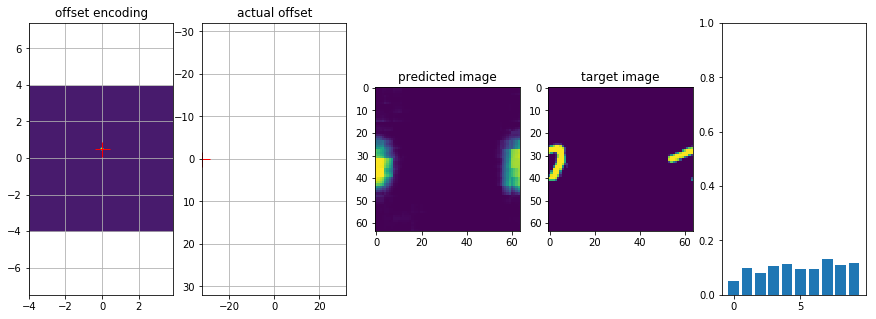

torch.Size([50, 1, 28, 28])
0 -28
[[-0.12740346  0.66741291]] [[-0.15631161  0.6775248 ]]


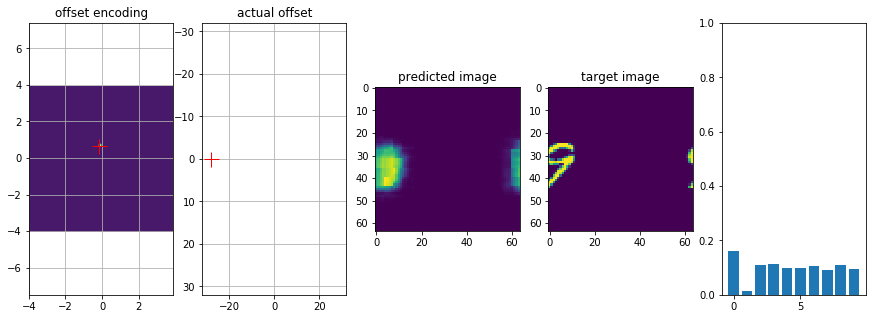

torch.Size([50, 1, 28, 28])
0 -24
[[-0.28526529  0.85571132]] [[-0.28669213  0.8638996 ]]


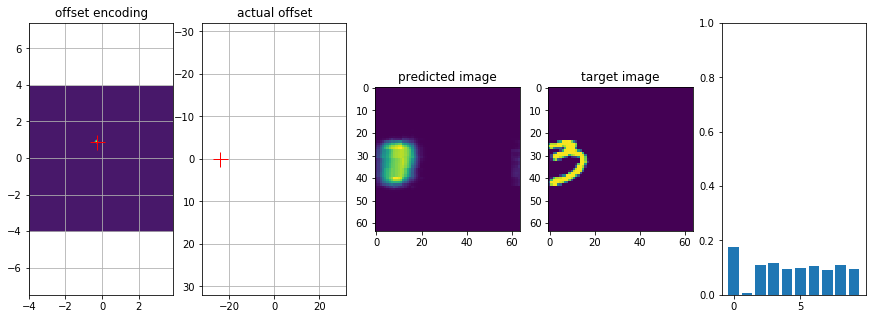

torch.Size([50, 1, 28, 28])
0 -20
[[-0.41682409  1.04585031]] [[-0.41653909  1.03703651]]


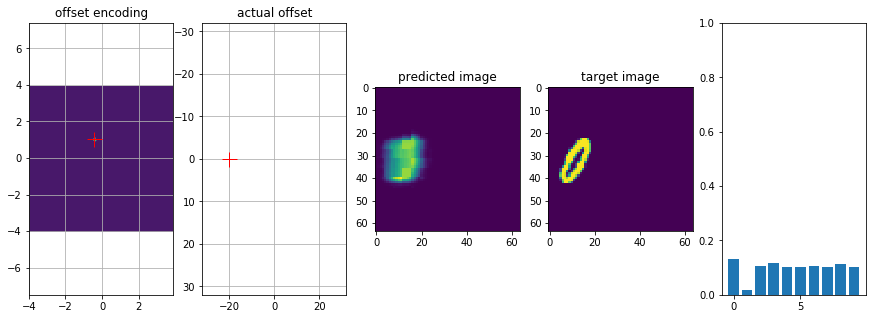

torch.Size([50, 1, 28, 28])
0 -16
[[-0.71505191  1.18325619]] [[-0.72105479  1.2131973 ]]


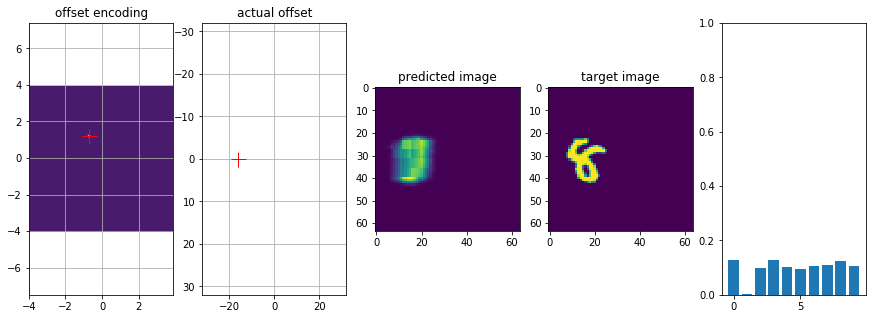

torch.Size([50, 1, 28, 28])
0 -12
[[-1.03106336  1.30872143]] [[-1.0258574   1.36192229]]


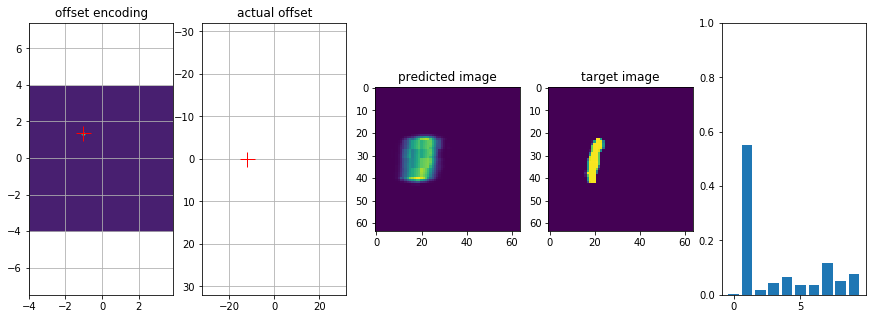

torch.Size([50, 1, 28, 28])
0 -8
[[-1.64614627  1.81452965]] [[-1.66261121  1.66258444]]


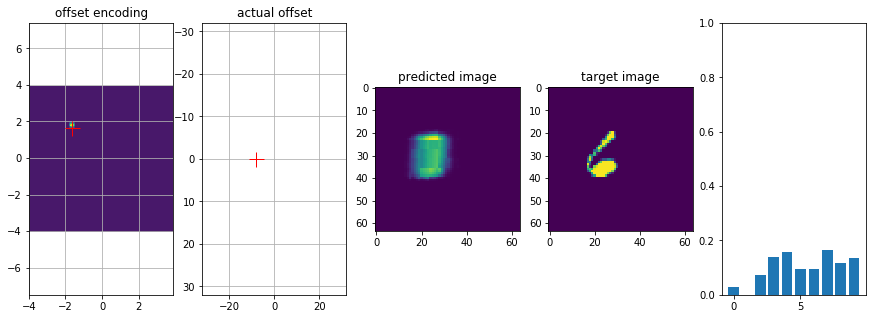

torch.Size([50, 1, 28, 28])
0 -4
[[-2.41681823  0.32325691]] [[-2.4478658  0.2725344]]


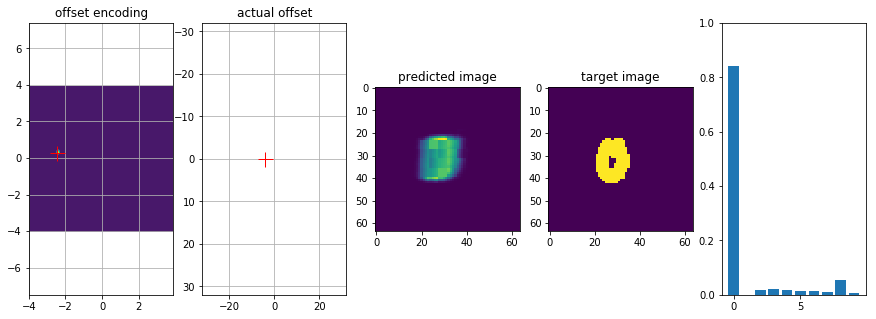

torch.Size([50, 1, 28, 28])
0 0
[[-1.96855108 -0.87260604]] [[-1.83999292 -0.97356649]]


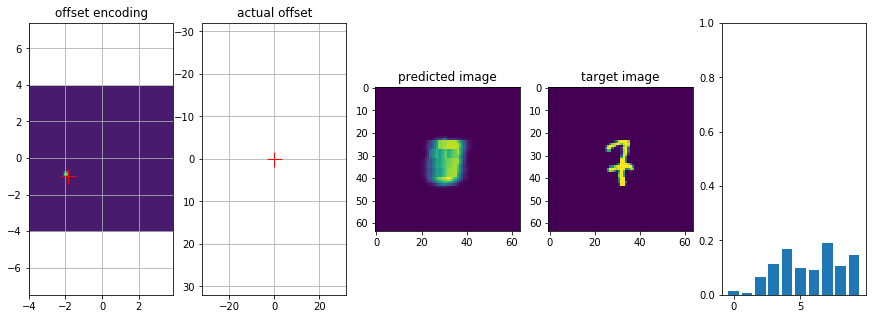

torch.Size([50, 1, 28, 28])
0 4
[[-0.4689011  -2.63114841]] [[-0.39801949 -2.63117234]]


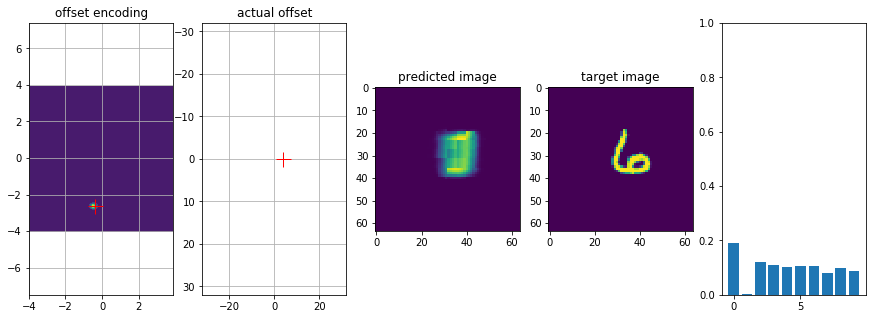

torch.Size([50, 1, 28, 28])
0 8
[[-0.09553585 -1.75764915]] [[-0.04212584 -1.72392276]]


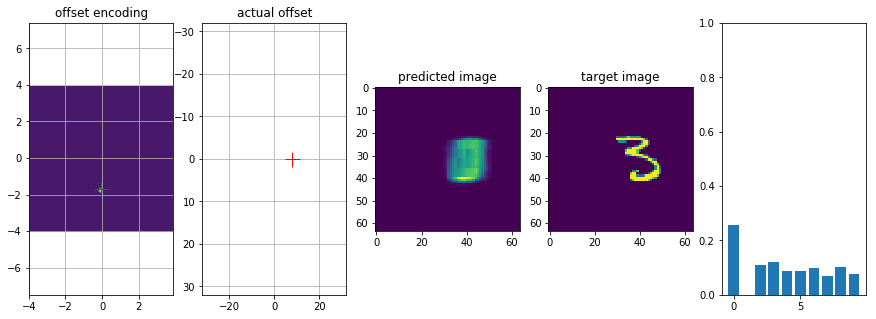

torch.Size([50, 1, 28, 28])
0 12
[[ 0.31769333 -1.43813033]] [[ 0.33601742 -1.40725629]]


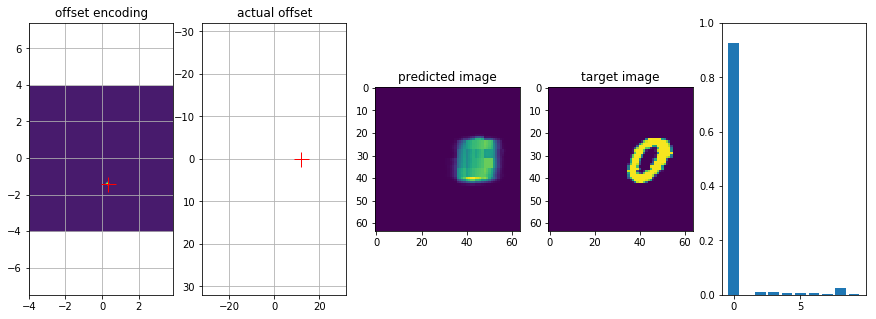

torch.Size([50, 1, 28, 28])
0 16
[[ 0.43758854 -1.14695878]] [[ 0.42292209 -1.15110812]]


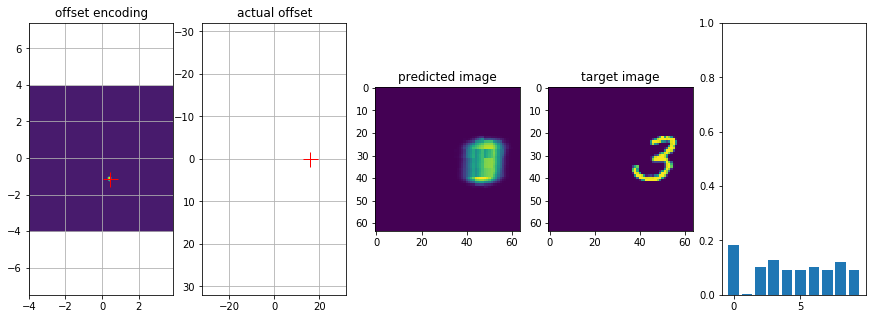

torch.Size([50, 1, 28, 28])
0 20
[[ 0.46969735 -0.9042554 ]] [[ 0.43685311 -0.88832547]]


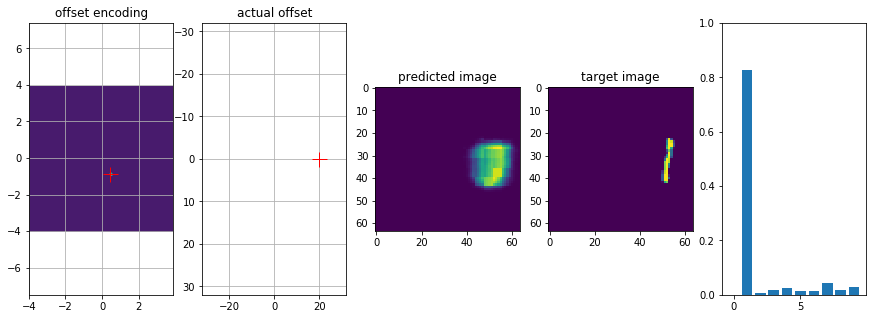

torch.Size([50, 1, 28, 28])
0 24
[[ 0.53574628 -0.69758918]] [[ 0.52872403 -0.69856108]]


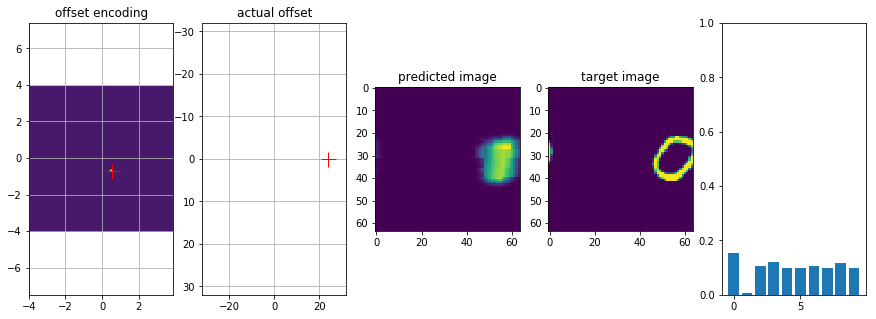

torch.Size([50, 1, 28, 28])
0 28
[[ 0.47567013 -0.45689882]] [[ 0.47287829 -0.44319356]]


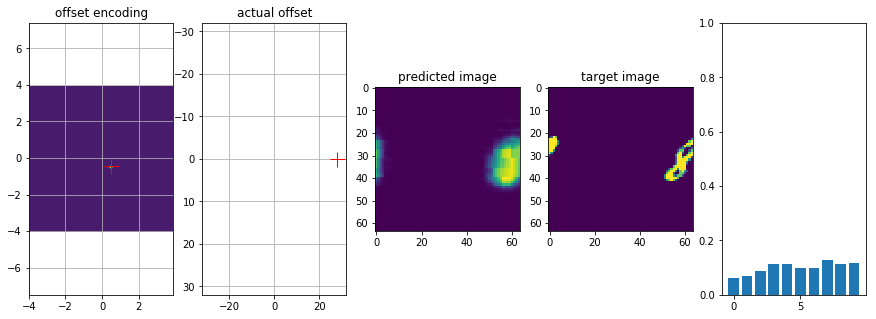

In [18]:
%matplotlib inline
import torch

from Where_act_code_VAE_full import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    z_logit_output, z_hat_output, mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:6]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    ax[4].bar(np.arange(10), F.softmax(z_logit_output[0,:]).detach().numpy())
    ax[4].set_ylim([0,1])
    #ax[4].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

In [ ]:

%matplotlib inline
import torch

from Where_act_code_VAE_full import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[6:10]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    plt.show()    

In [ ]:
from Where_act_code_VAE_full import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(10):
    #label[idx] = z
    idx = 1
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[9:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
weights = torch.tensor([[0, 10, 3, 0], [2, 2, 3, 4]], dtype=torch.float)

In [ ]:
weights.size(0)

In [ ]:
torch.multinomial(weights, 1) #, replacement=True)

In [ ]:
torch.nn.functional.softmax(torch.tensor([-1, 0, 1], dtype = torch.float))

In [ ]:
[[]]*5